# Intro


| Axial       | Coronal     | Sagittal    |
| ----------- | ----------- | ----------- |
| 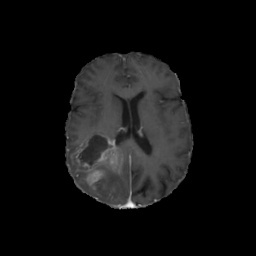      |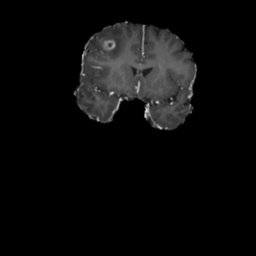        |      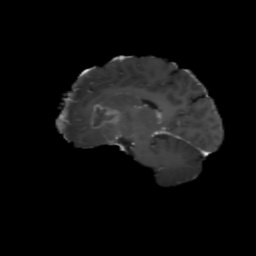       |



# Workspace Configuration

In [26]:
# Global imports
import shutil
import zipfile
import os
import torch
import urllib.request
from IPython.display import Image, display

In [14]:
# This block make sense only if runned on Google Collaboratory
if os.path.exists('sample_data'):
  shutil.rmtree('sample_data')

In [ ]:
# Clone YOLOv5 Repository
if os.path.exists('yolov5'):
  shutil.rmtree('yolov5/runs')
else:
  !git clone https://github.com/ultralytics/yolov5
  %cd yolov5
  %pip install -r requirements.txt
  %cd ..

In [15]:
# Download and unzip the dataset

if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/giuseppebrb/BrainTumorDetection/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

In [24]:
# Folder for fine-tuned models
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [25]:
#  Check if cuda available / mps available / only CPU
if torch.cuda.is_available():
  device = 0
else:
  device = 'cpu'

# Training

## Axial Plane Model

In [ ]:
# Training axial plane
!python yolov5/train.py --img 480 --batch 64 --epochs 400 --data ./data/axial/axial.yaml --weights yolov5m.pt --device 0 --name axial --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder


2024-02-18 19:50:24.814111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:50:24.814170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:50:24.821243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=./data/axial/axial.yaml, hyp=./data/augmentation.yaml, epochs=400, batch_size=64, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single

In [27]:
shutil.copyfile('yolov5/runs/train/axial4/weights/best.pt', f'{output_folder}/tumor_detector_axial.pt')

'output_models/tumor_detector_axial.pt'

### F1 Curve

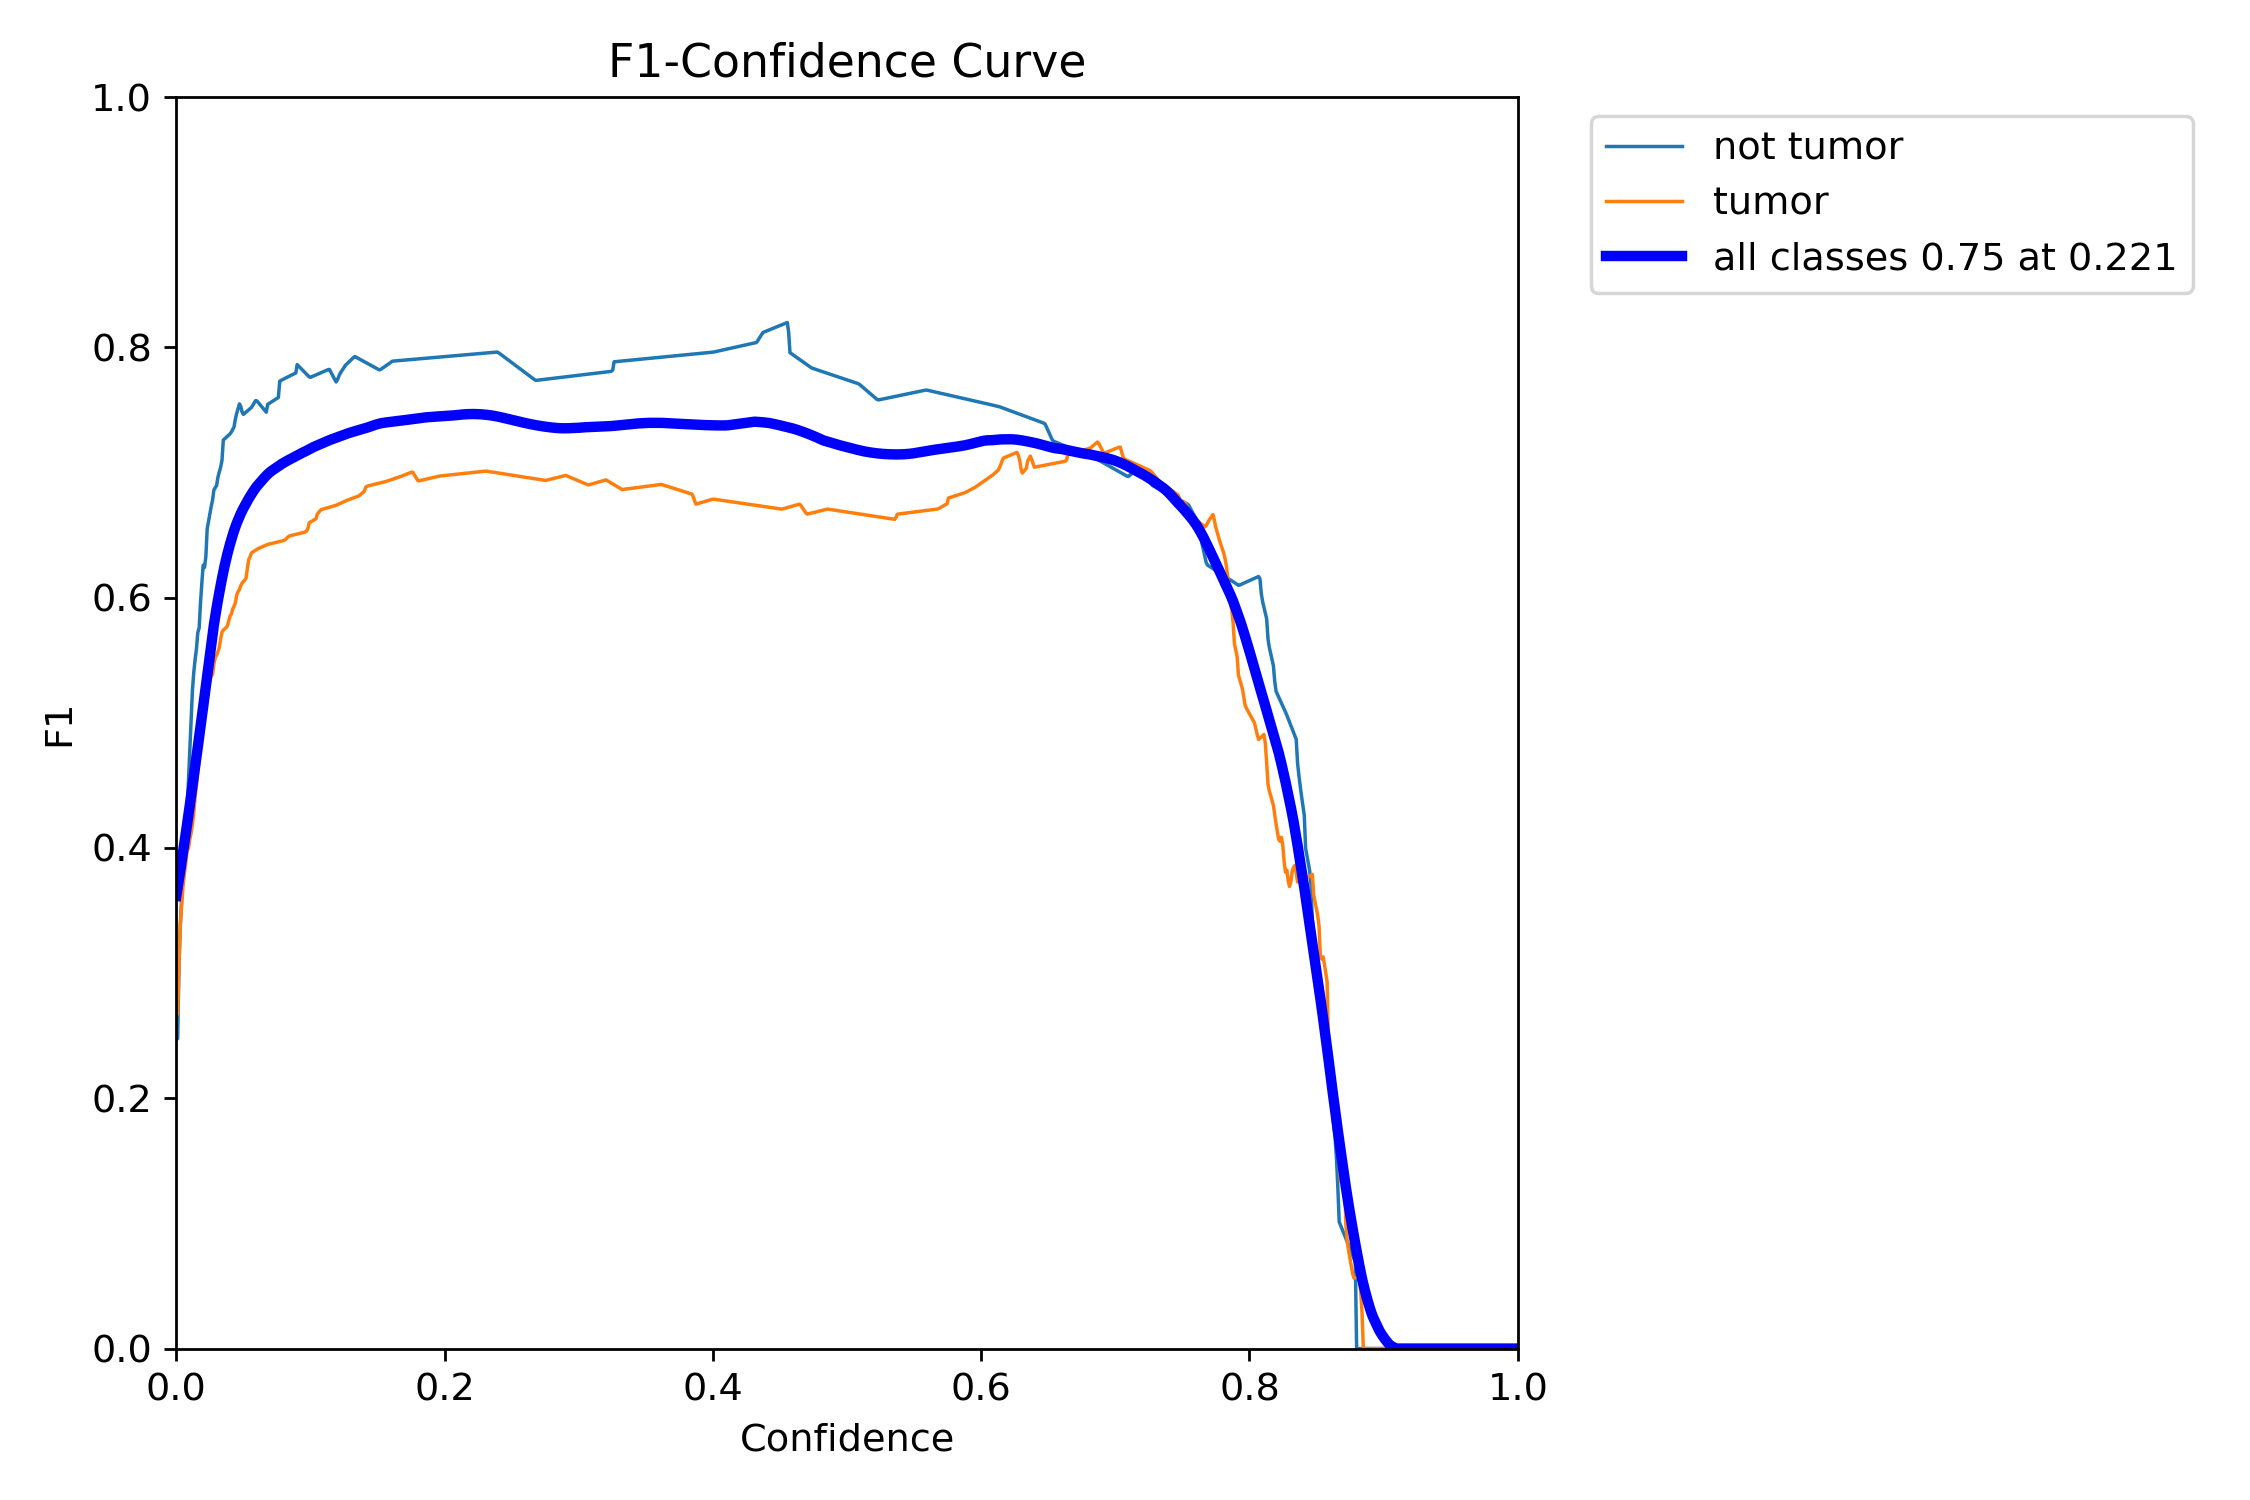

In [ ]:
display(Image(filename='yolov5/runs/train/axial/F1_curve.png'))

### PR Curve

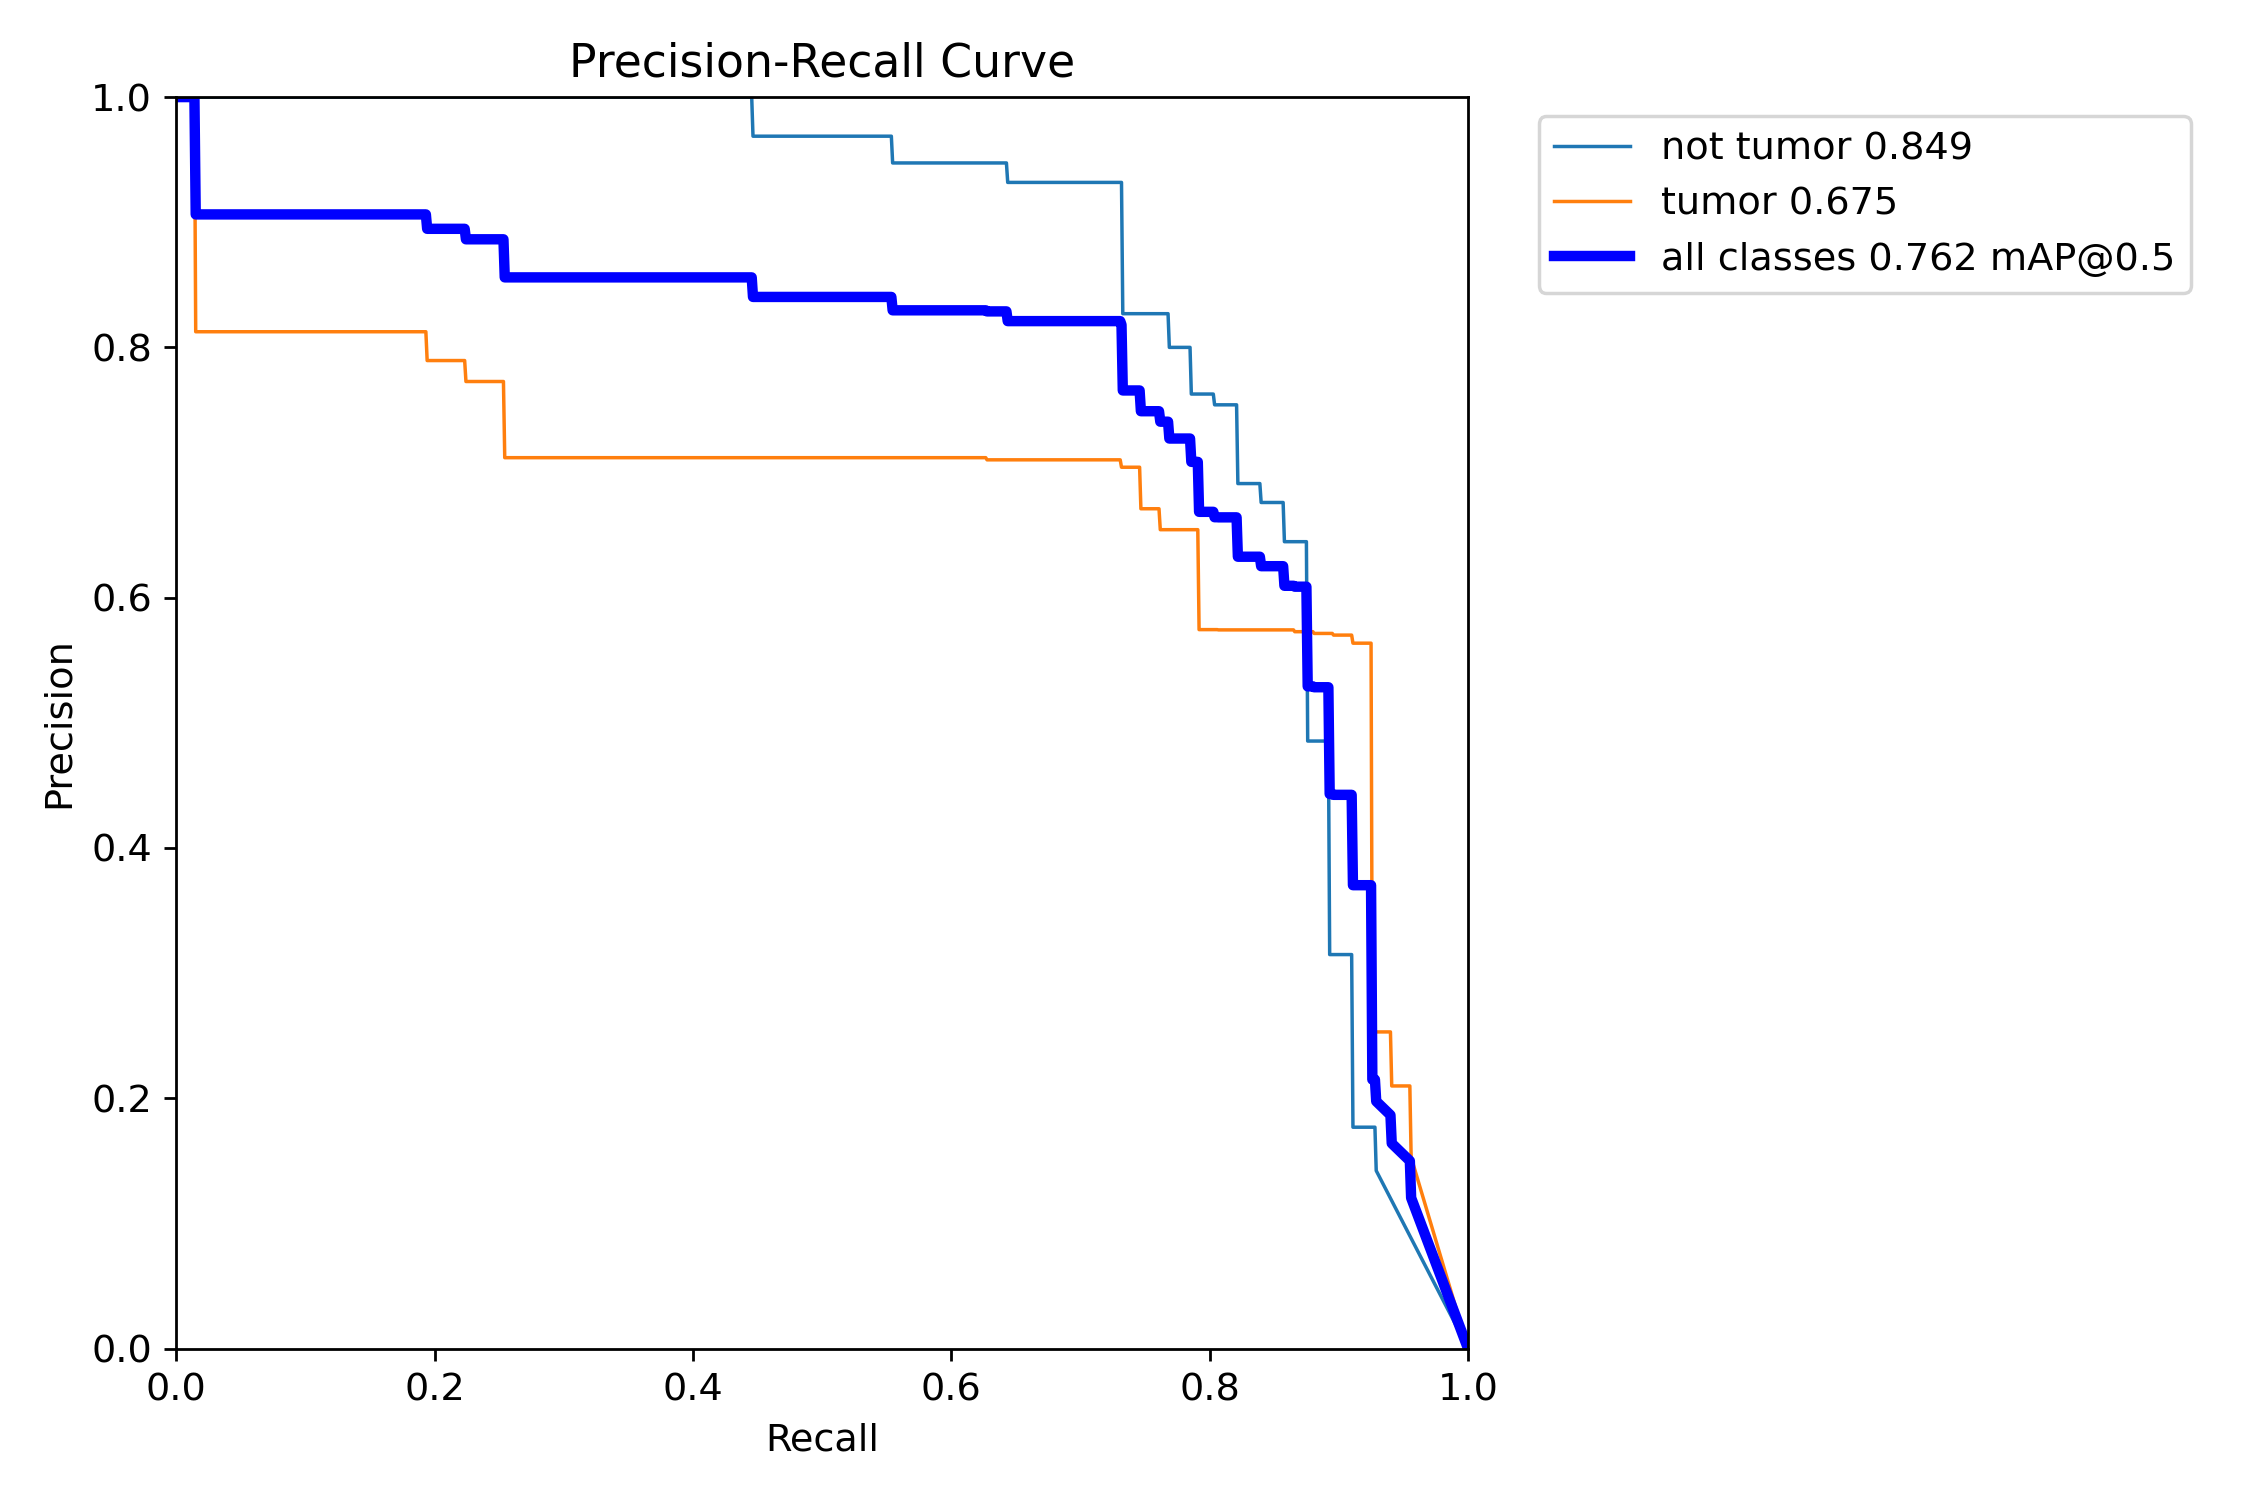

In [ ]:
display(Image(filename='yolov5/runs/train/axial/PR_curve.png'))

### Confusion Matrix

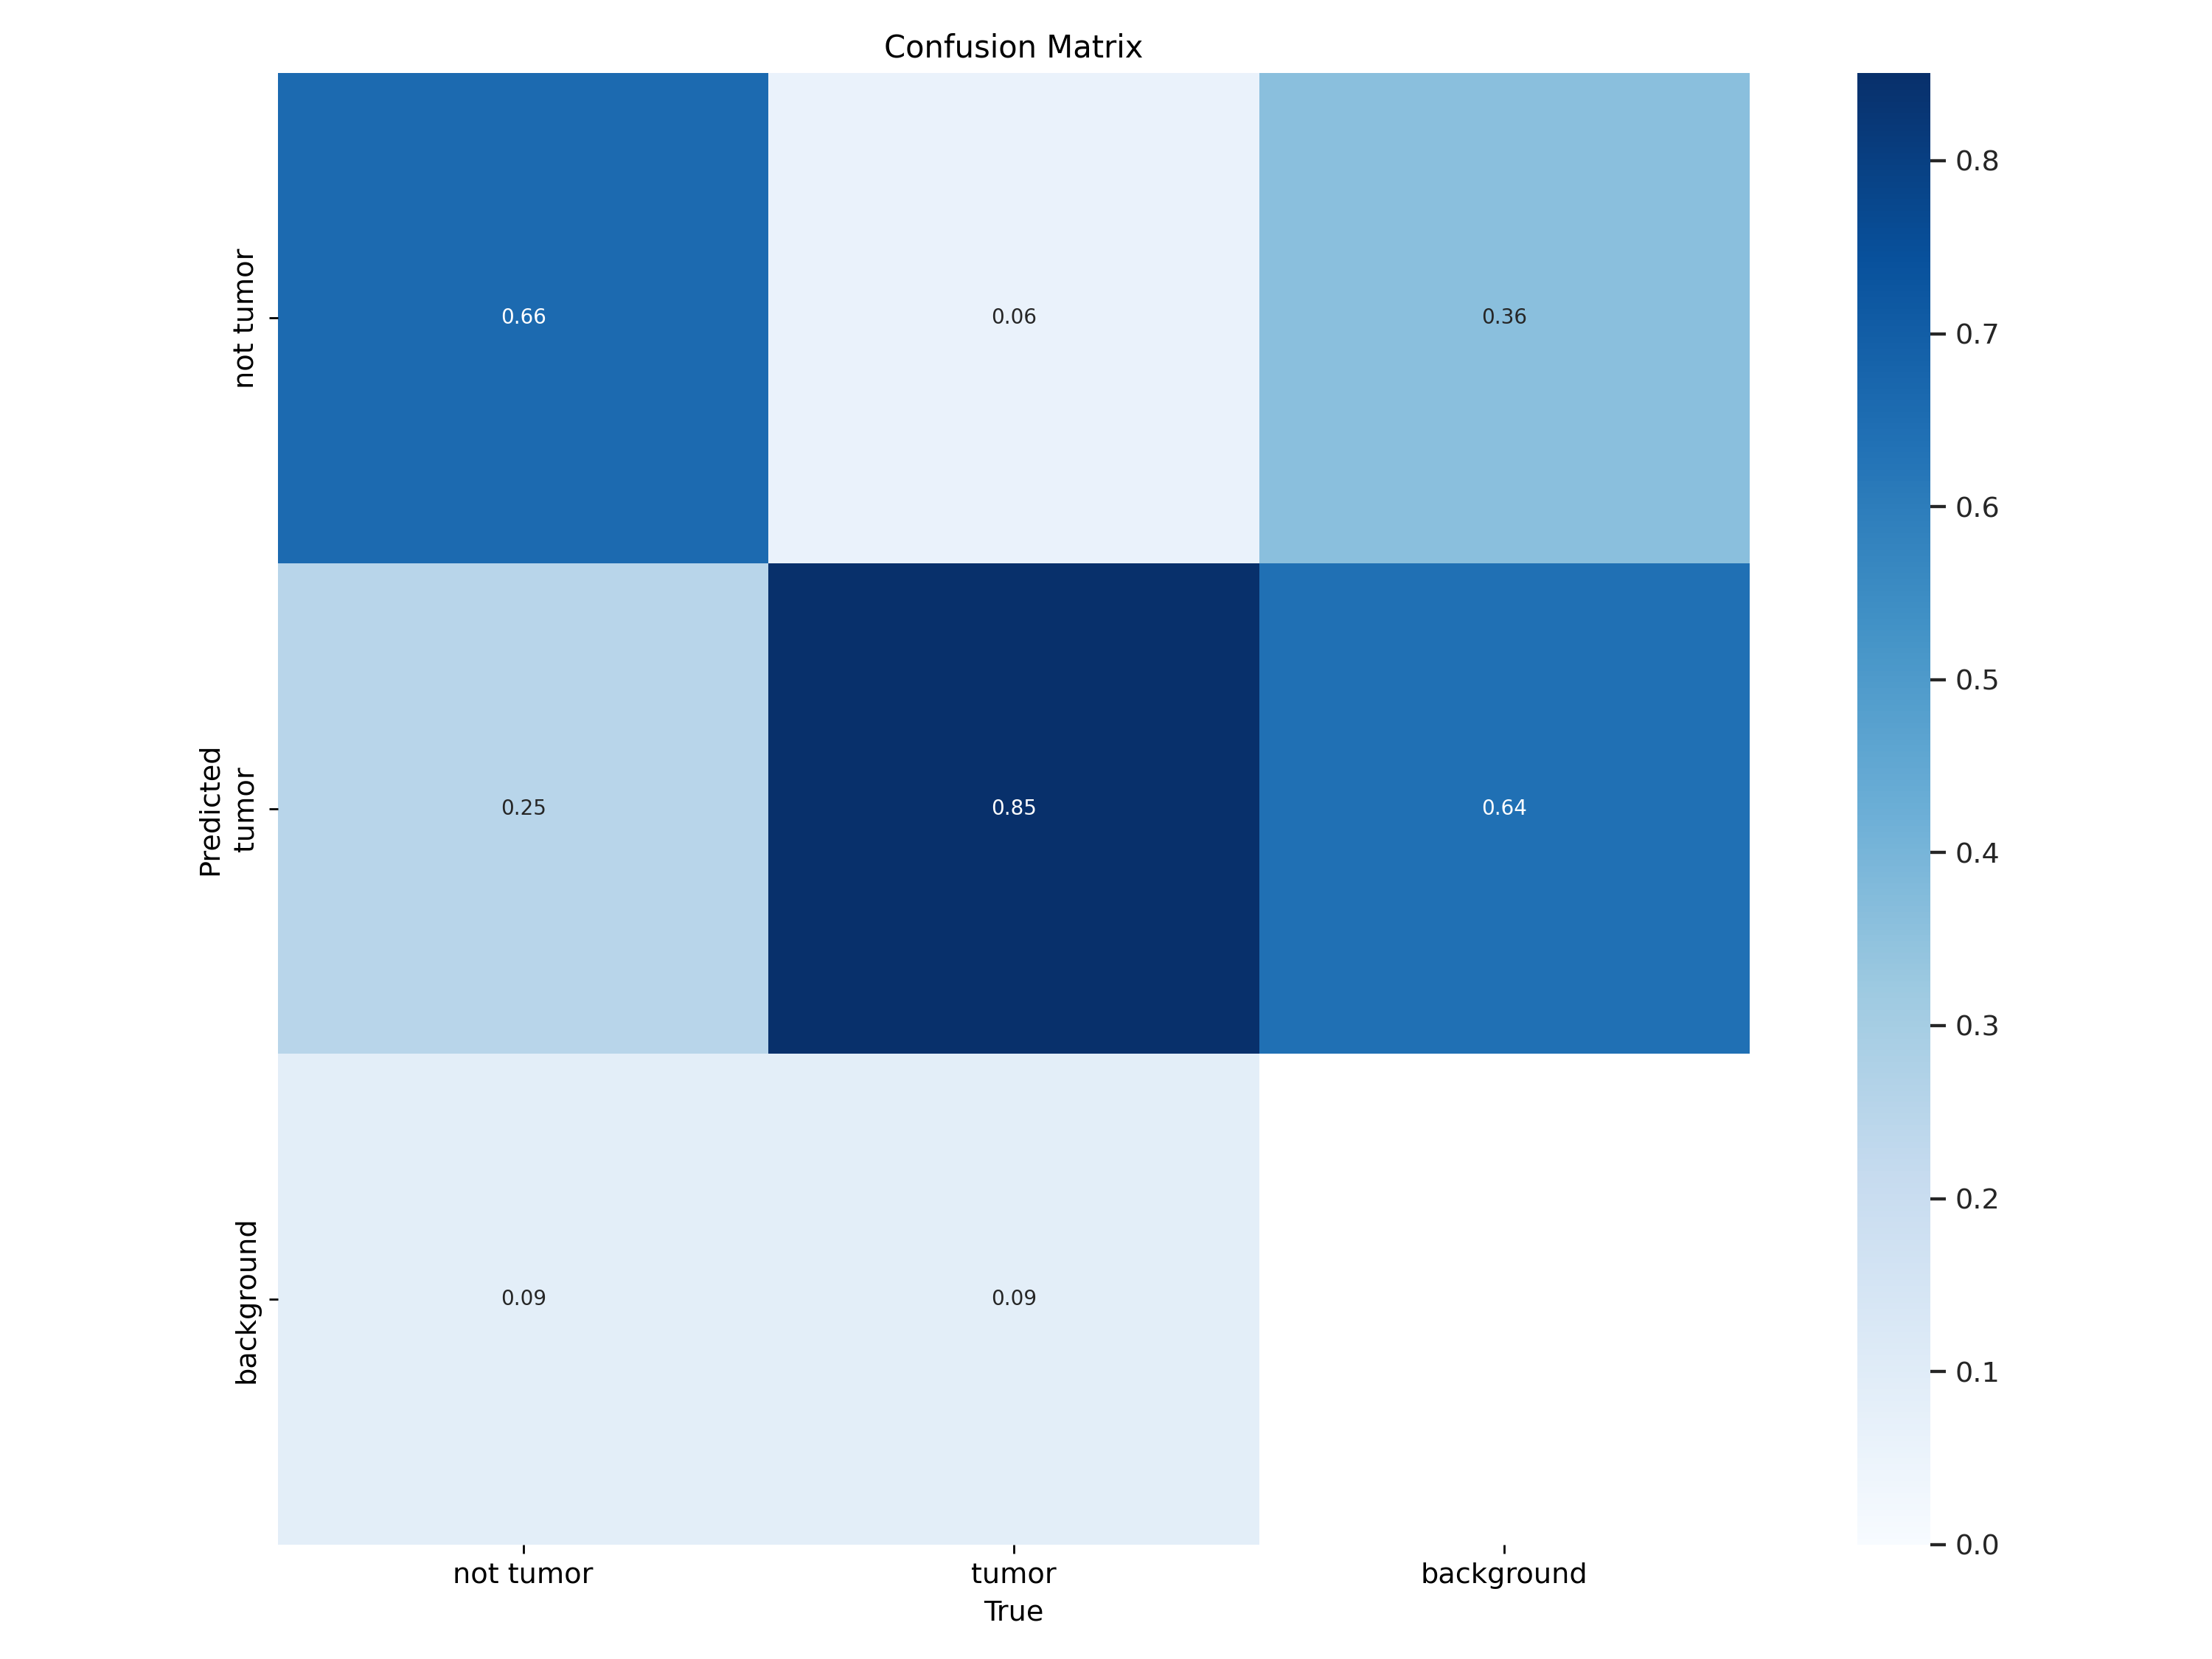

In [ ]:
display(Image(filename='yolov5/runs/train/axial/confusion_matrix.png'))

### Results summary

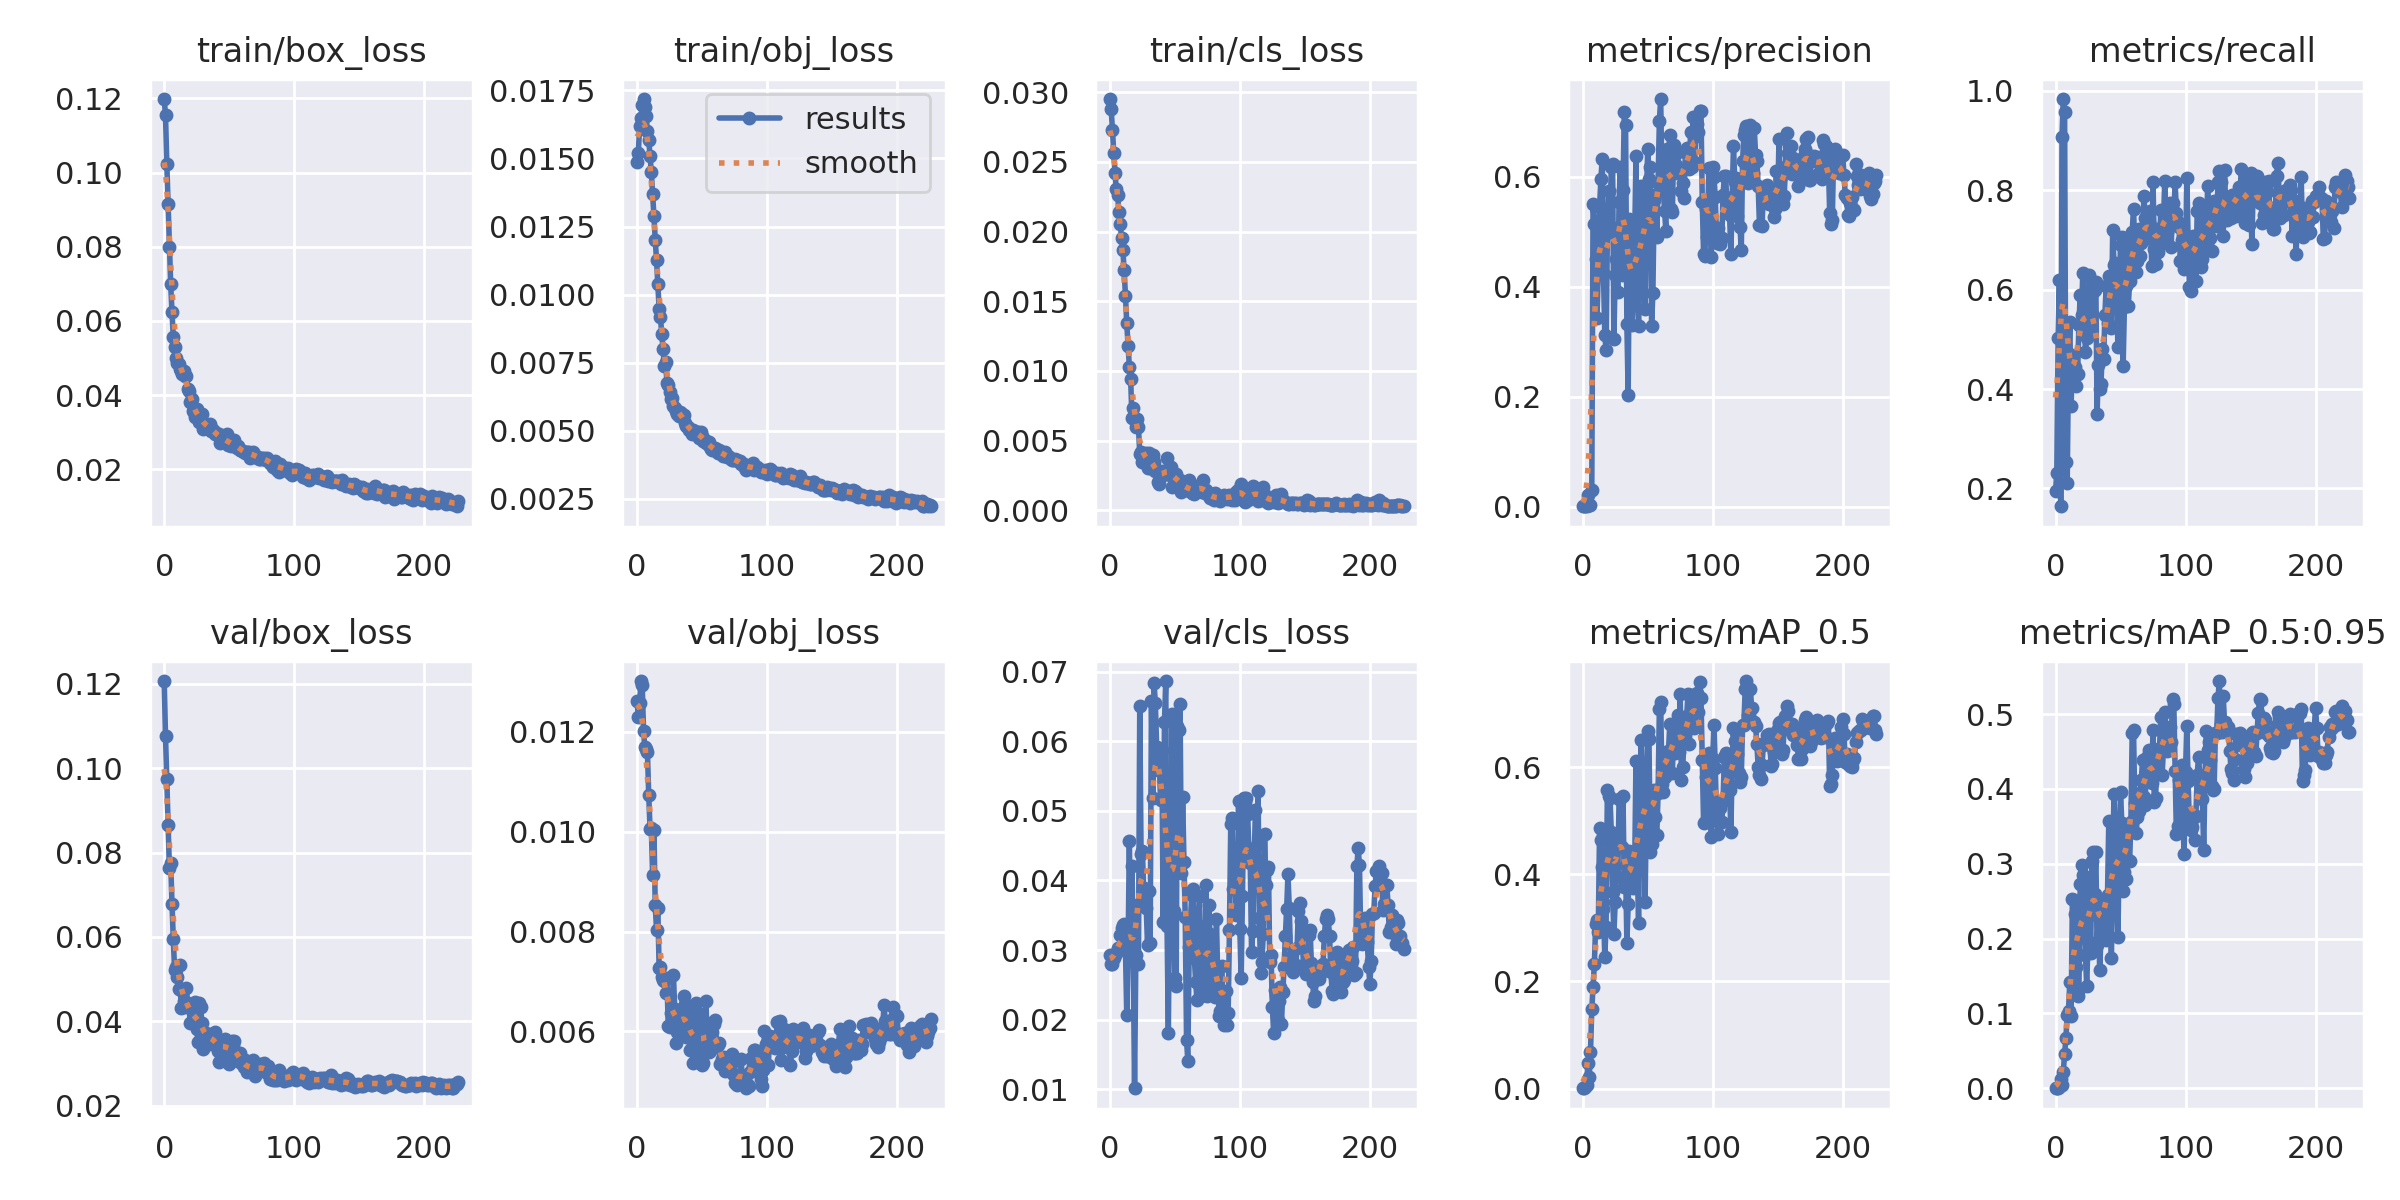

In [ ]:
display(Image(filename='yolov5/runs/train/axial/results.png'))

## Coronal Plane Model

In [ ]:
# Training coronal plane
!python yolov5/train.py --img 480 --batch 80 --epochs 200 --data data/coronal/coronal.yaml --weights yolov5m.pt --device {device} --name coronal --hyp ./data/augmentation.yaml


2024-02-18 19:48:38.685022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:48:38.685088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:48:38.691275: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/coronal/coronal.yaml, hyp=./data/augmentation.yaml, epochs=200, batch_size=80, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device={device}, multi_scale=Fals

In [ ]:
# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/coronal/weights/best.pt', f'{output_folder}/tumor_detector_coronal.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5/runs/train/coronal/weights/best.pt'

In [ ]:
%cd /content/yolov5/runs/train/yolov5/runs/train
!zip -r coronal.zip coronal/

/content/yolov5/runs/train/yolov5/runs/train
  adding: coronal/ (stored 0%)
  adding: coronal/train_batch1.jpg (deflated 42%)
  adding: coronal/train_batch0.jpg (deflated 39%)
  adding: coronal/val_batch0_labels.jpg (deflated 52%)
  adding: coronal/PR_curve.png (deflated 17%)
  adding: coronal/opt.yaml (deflated 51%)
  adding: coronal/train_batch2.jpg (deflated 38%)
  adding: coronal/weights/ (stored 0%)
  adding: coronal/weights/best.pt (deflated 8%)
  adding: coronal/weights/last.pt (deflated 8%)
  adding: coronal/labels_correlogram.jpg (deflated 44%)
  adding: coronal/hyp.yaml (deflated 45%)
  adding: coronal/labels.jpg (deflated 36%)
  adding: coronal/val_batch0_pred.jpg (deflated 51%)
  adding: coronal/R_curve.png (deflated 12%)
  adding: coronal/confusion_matrix.png (deflated 33%)
  adding: coronal/events.out.tfevents.1707671669.14dba0a289cf.13377.0 (deflated 40%)
  adding: coronal/results.csv (deflated 83%)
  adding: coronal/P_curve.png (deflated 12%)
  adding: coronal/results.p

In [ ]:
from google.colab import files
files.download('coronal.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### F1 Curve

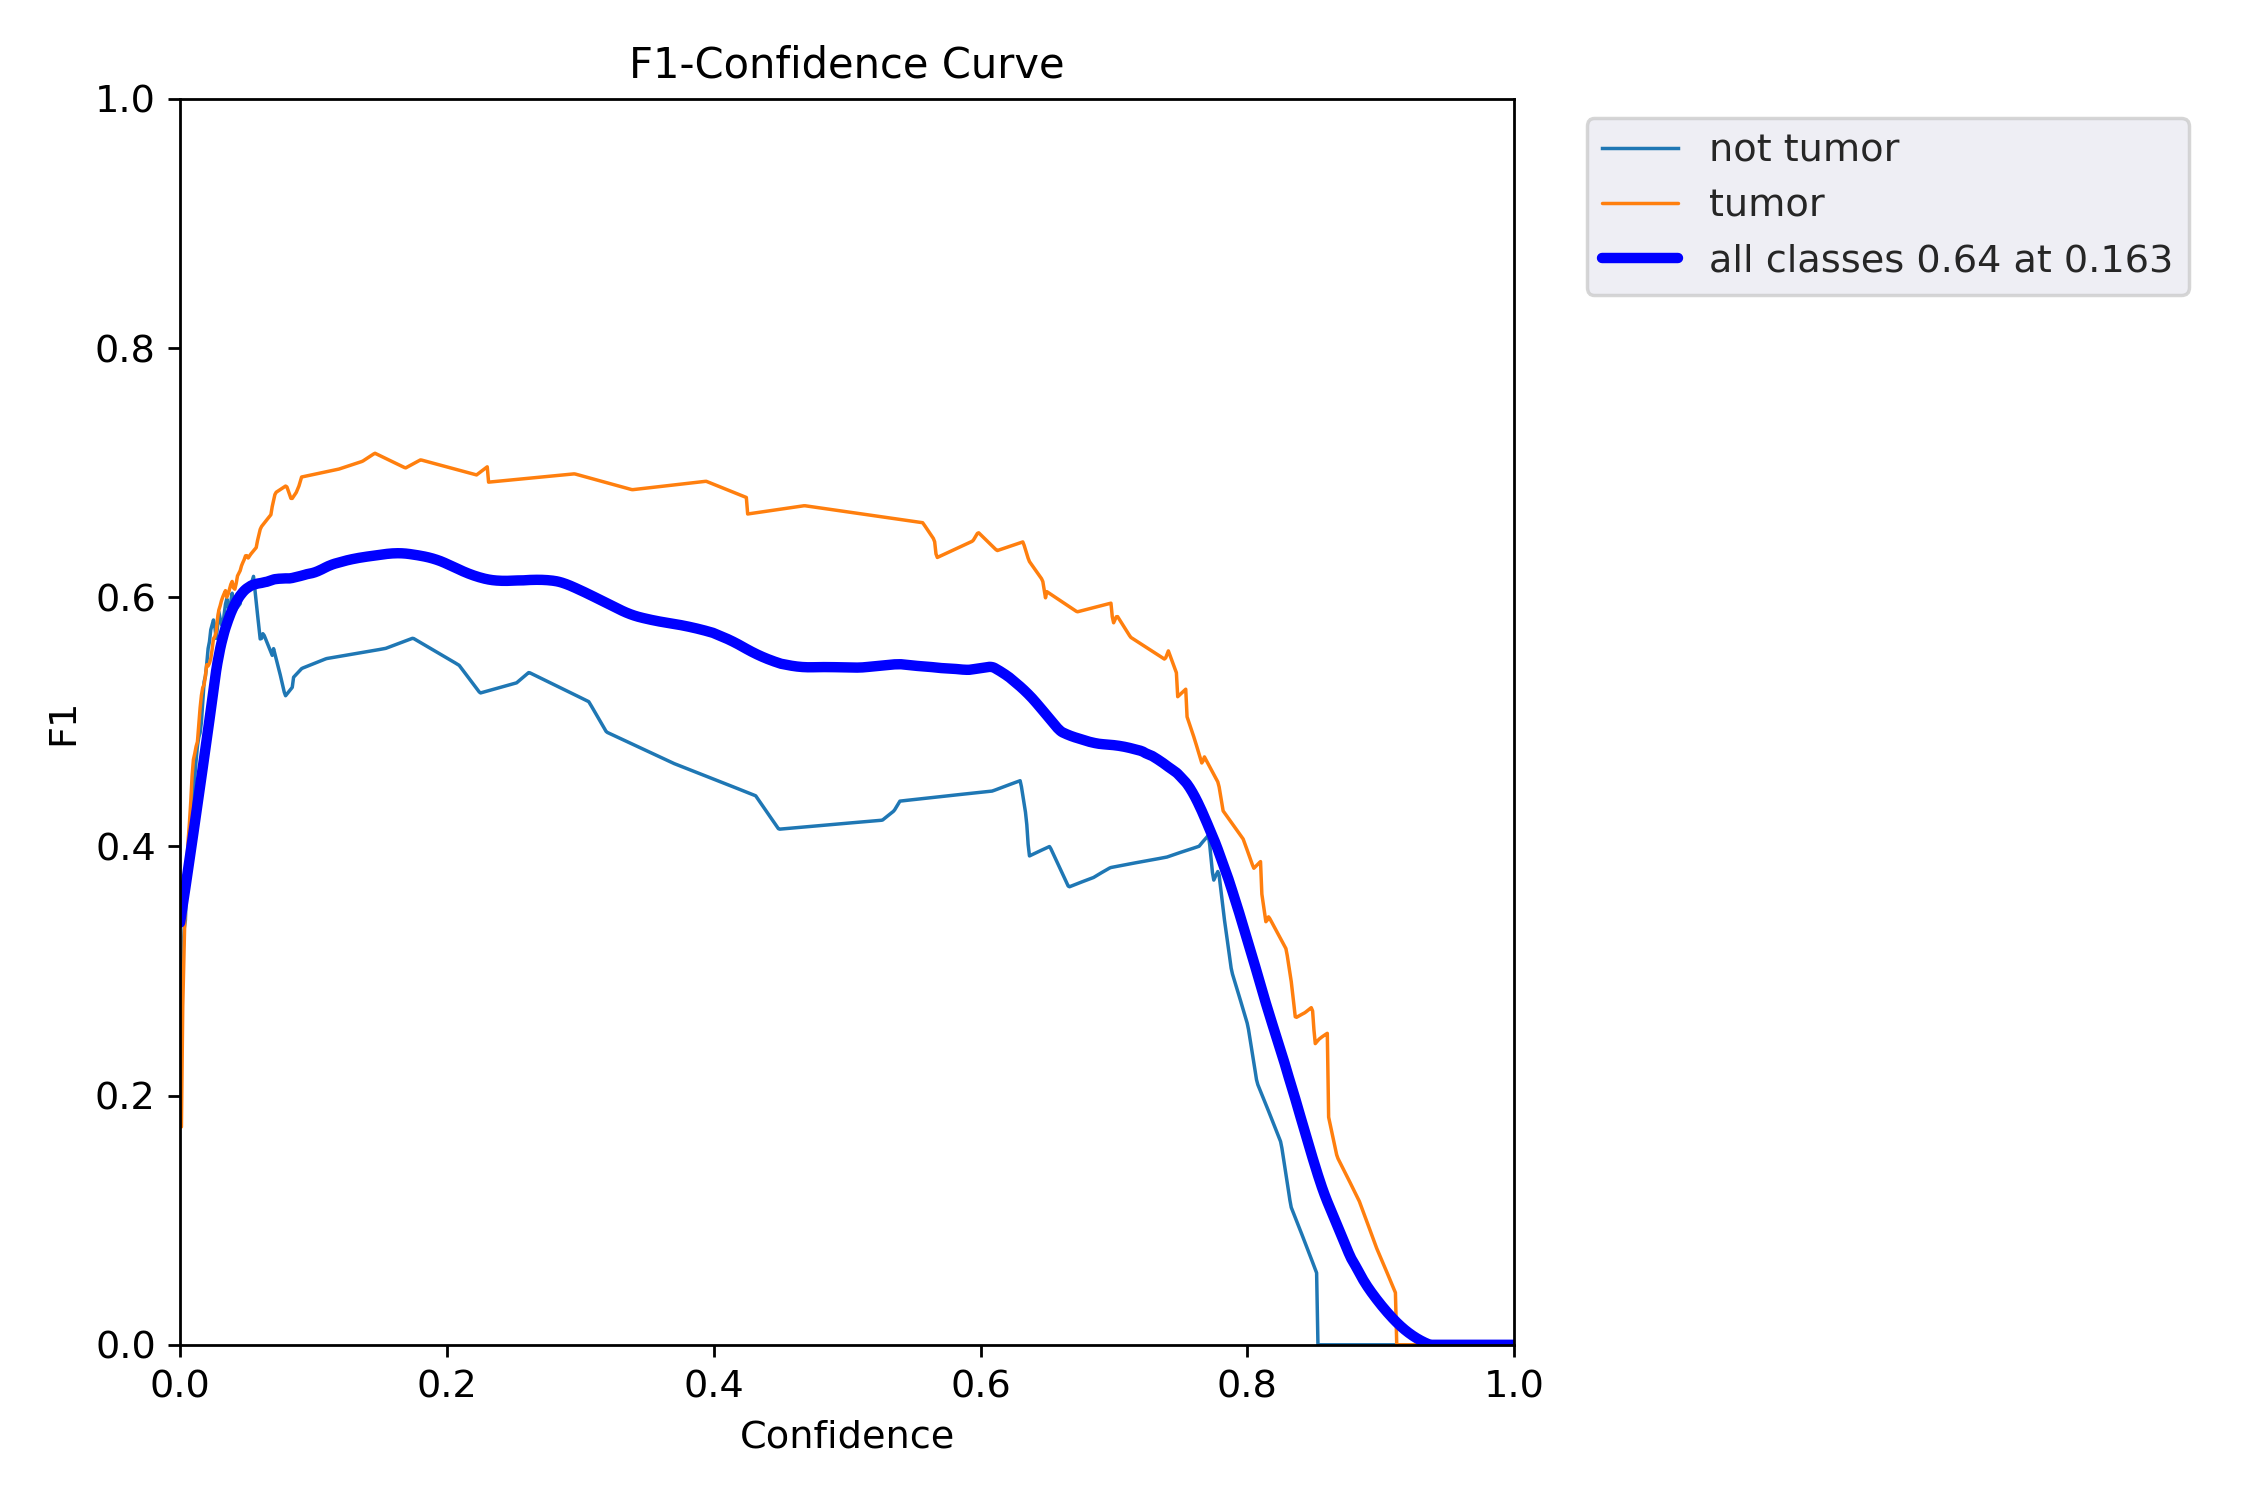

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/F1_curve.png'))

### PR Curve

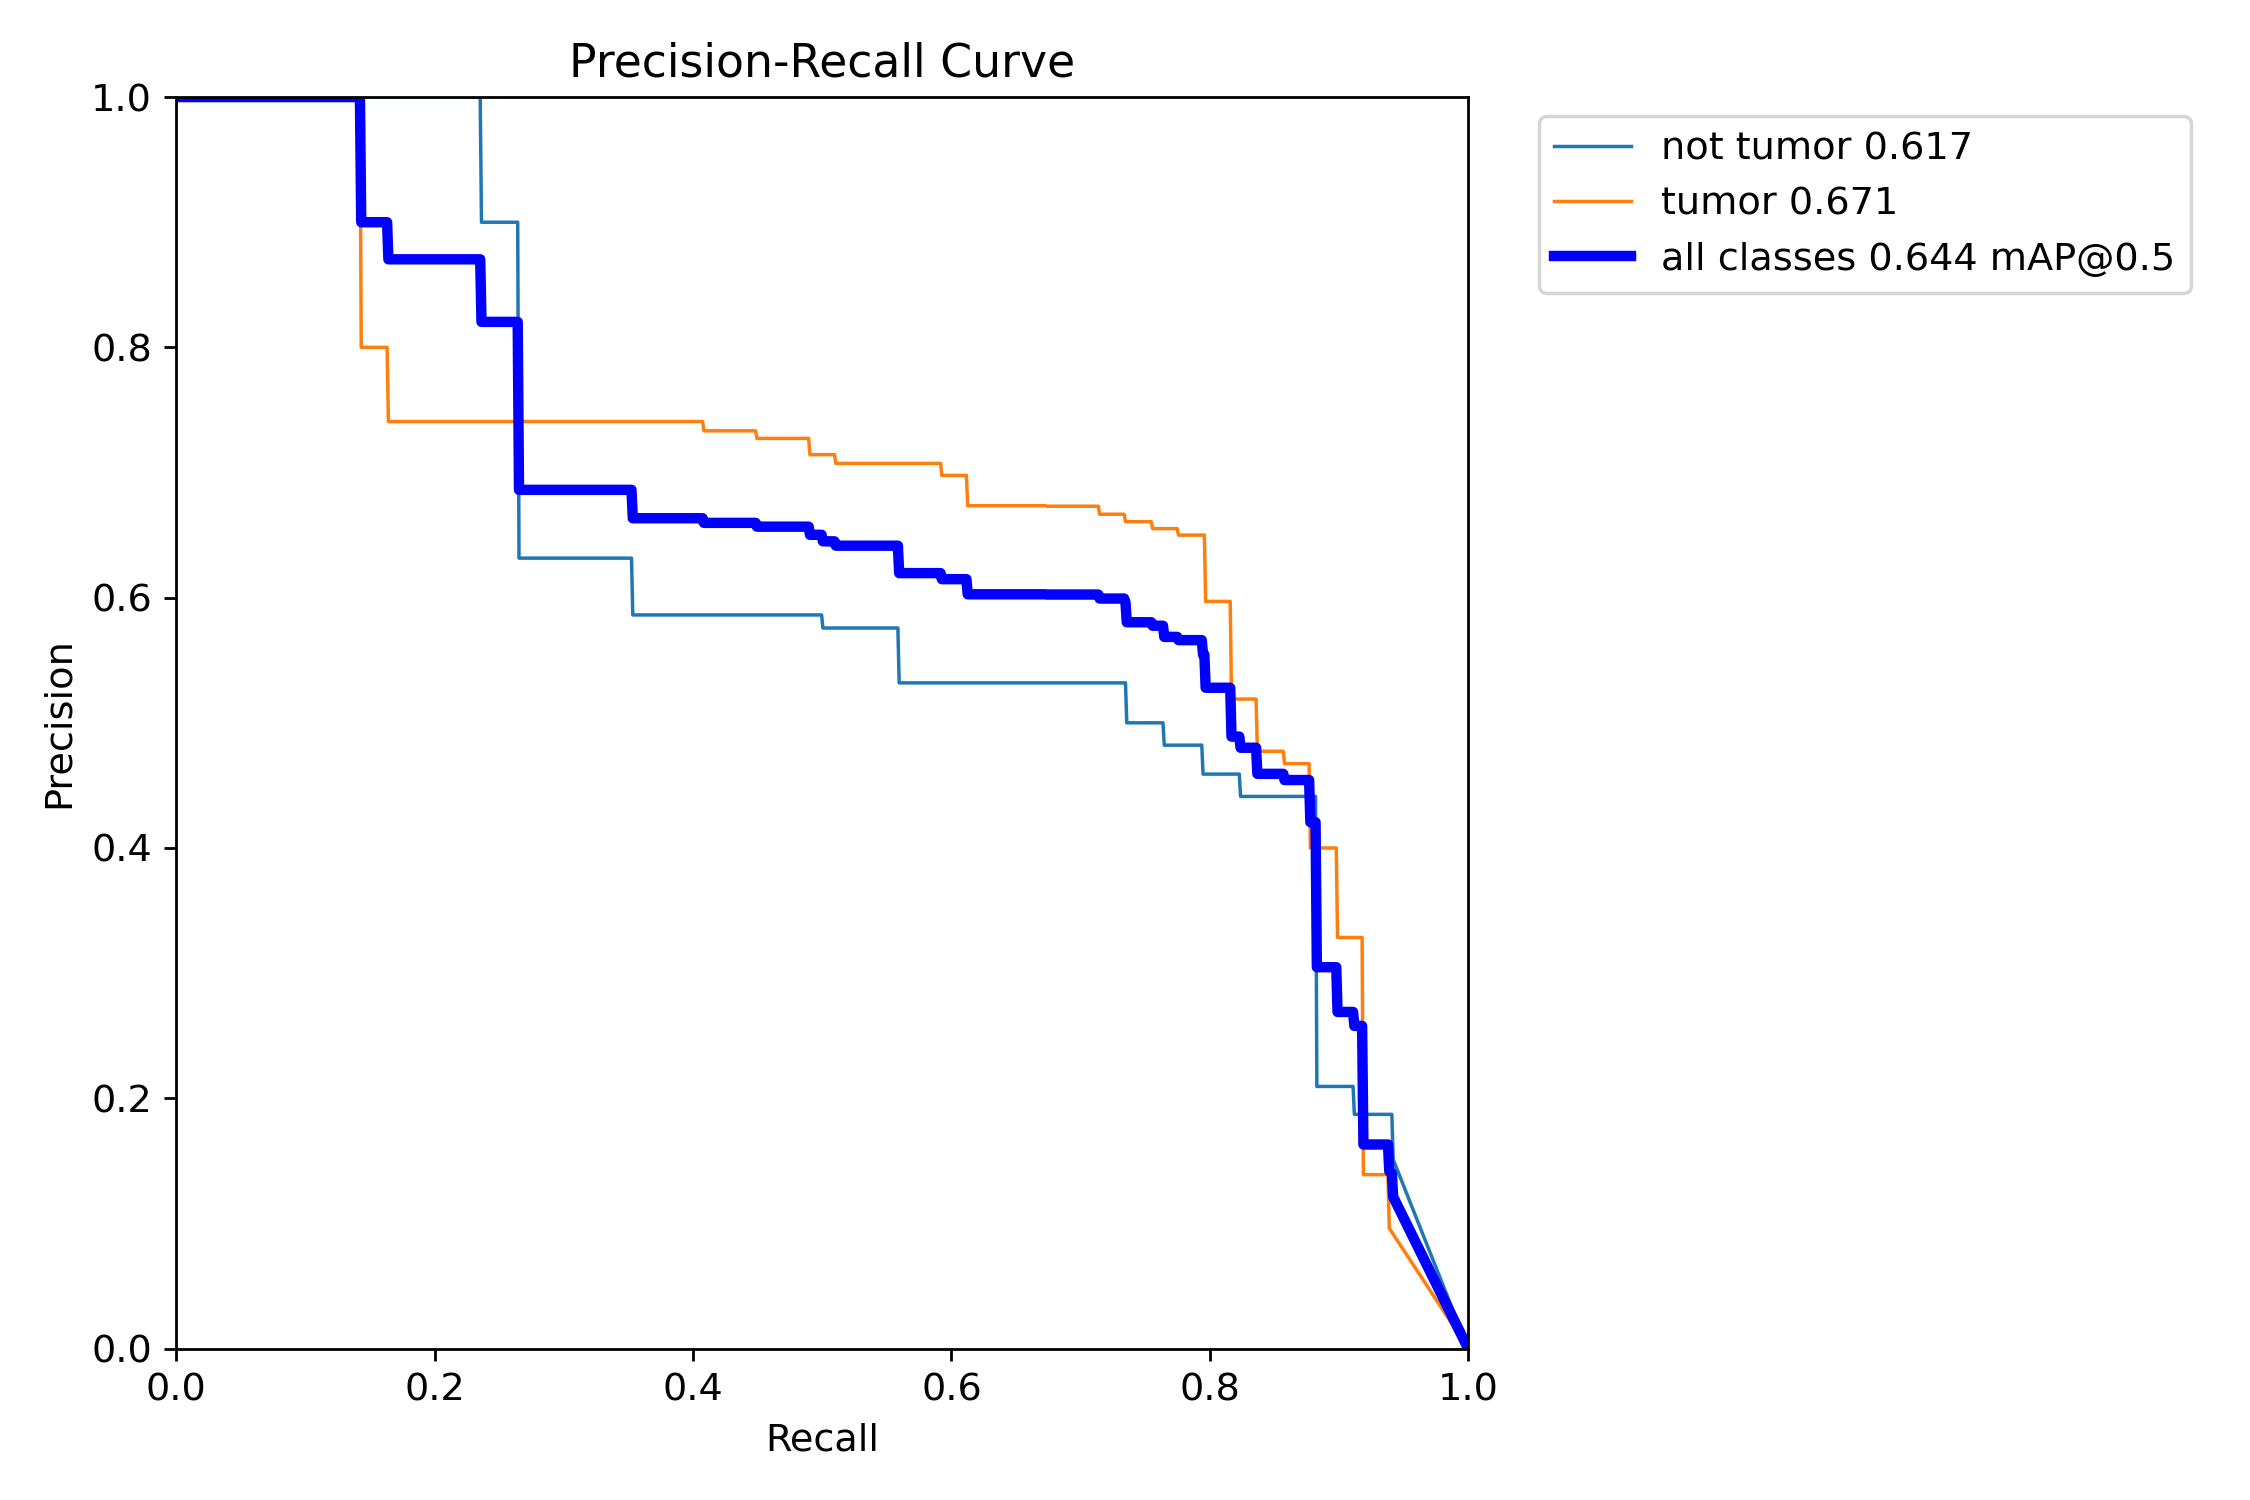

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/PR_curve.png'))

### Confusion Matrix

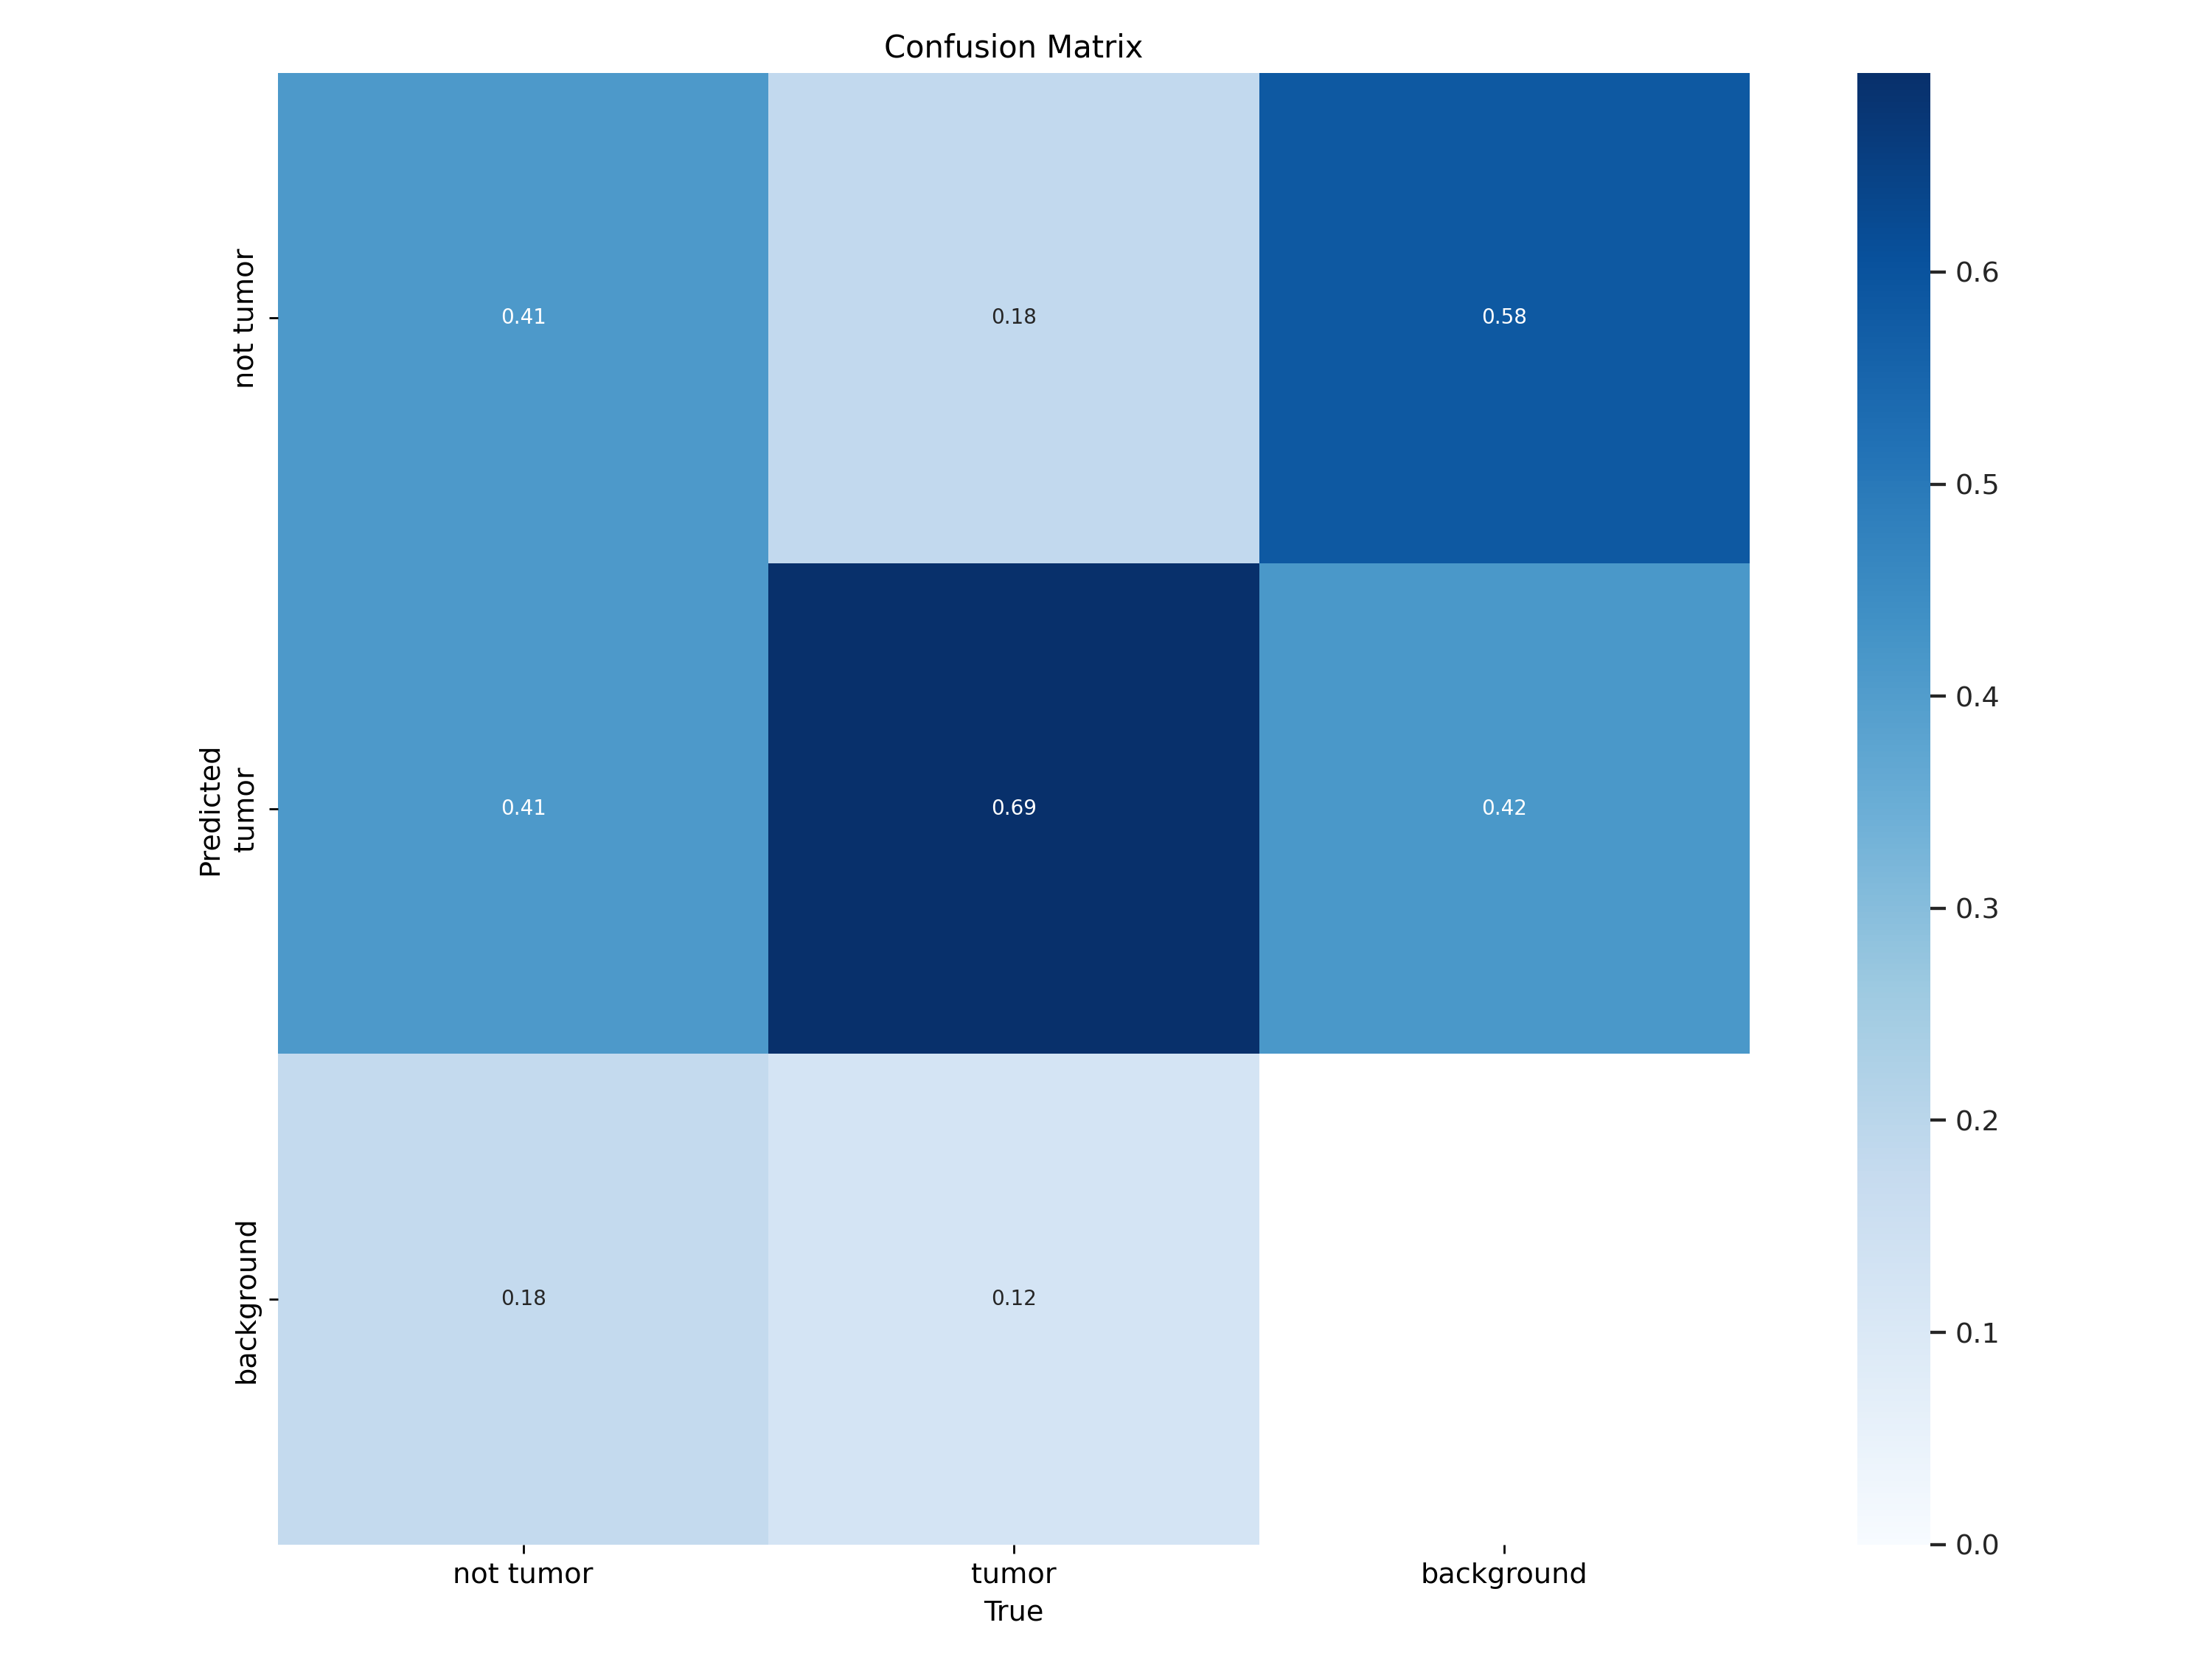

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/confusion_matrix.png'))

### Results Summary

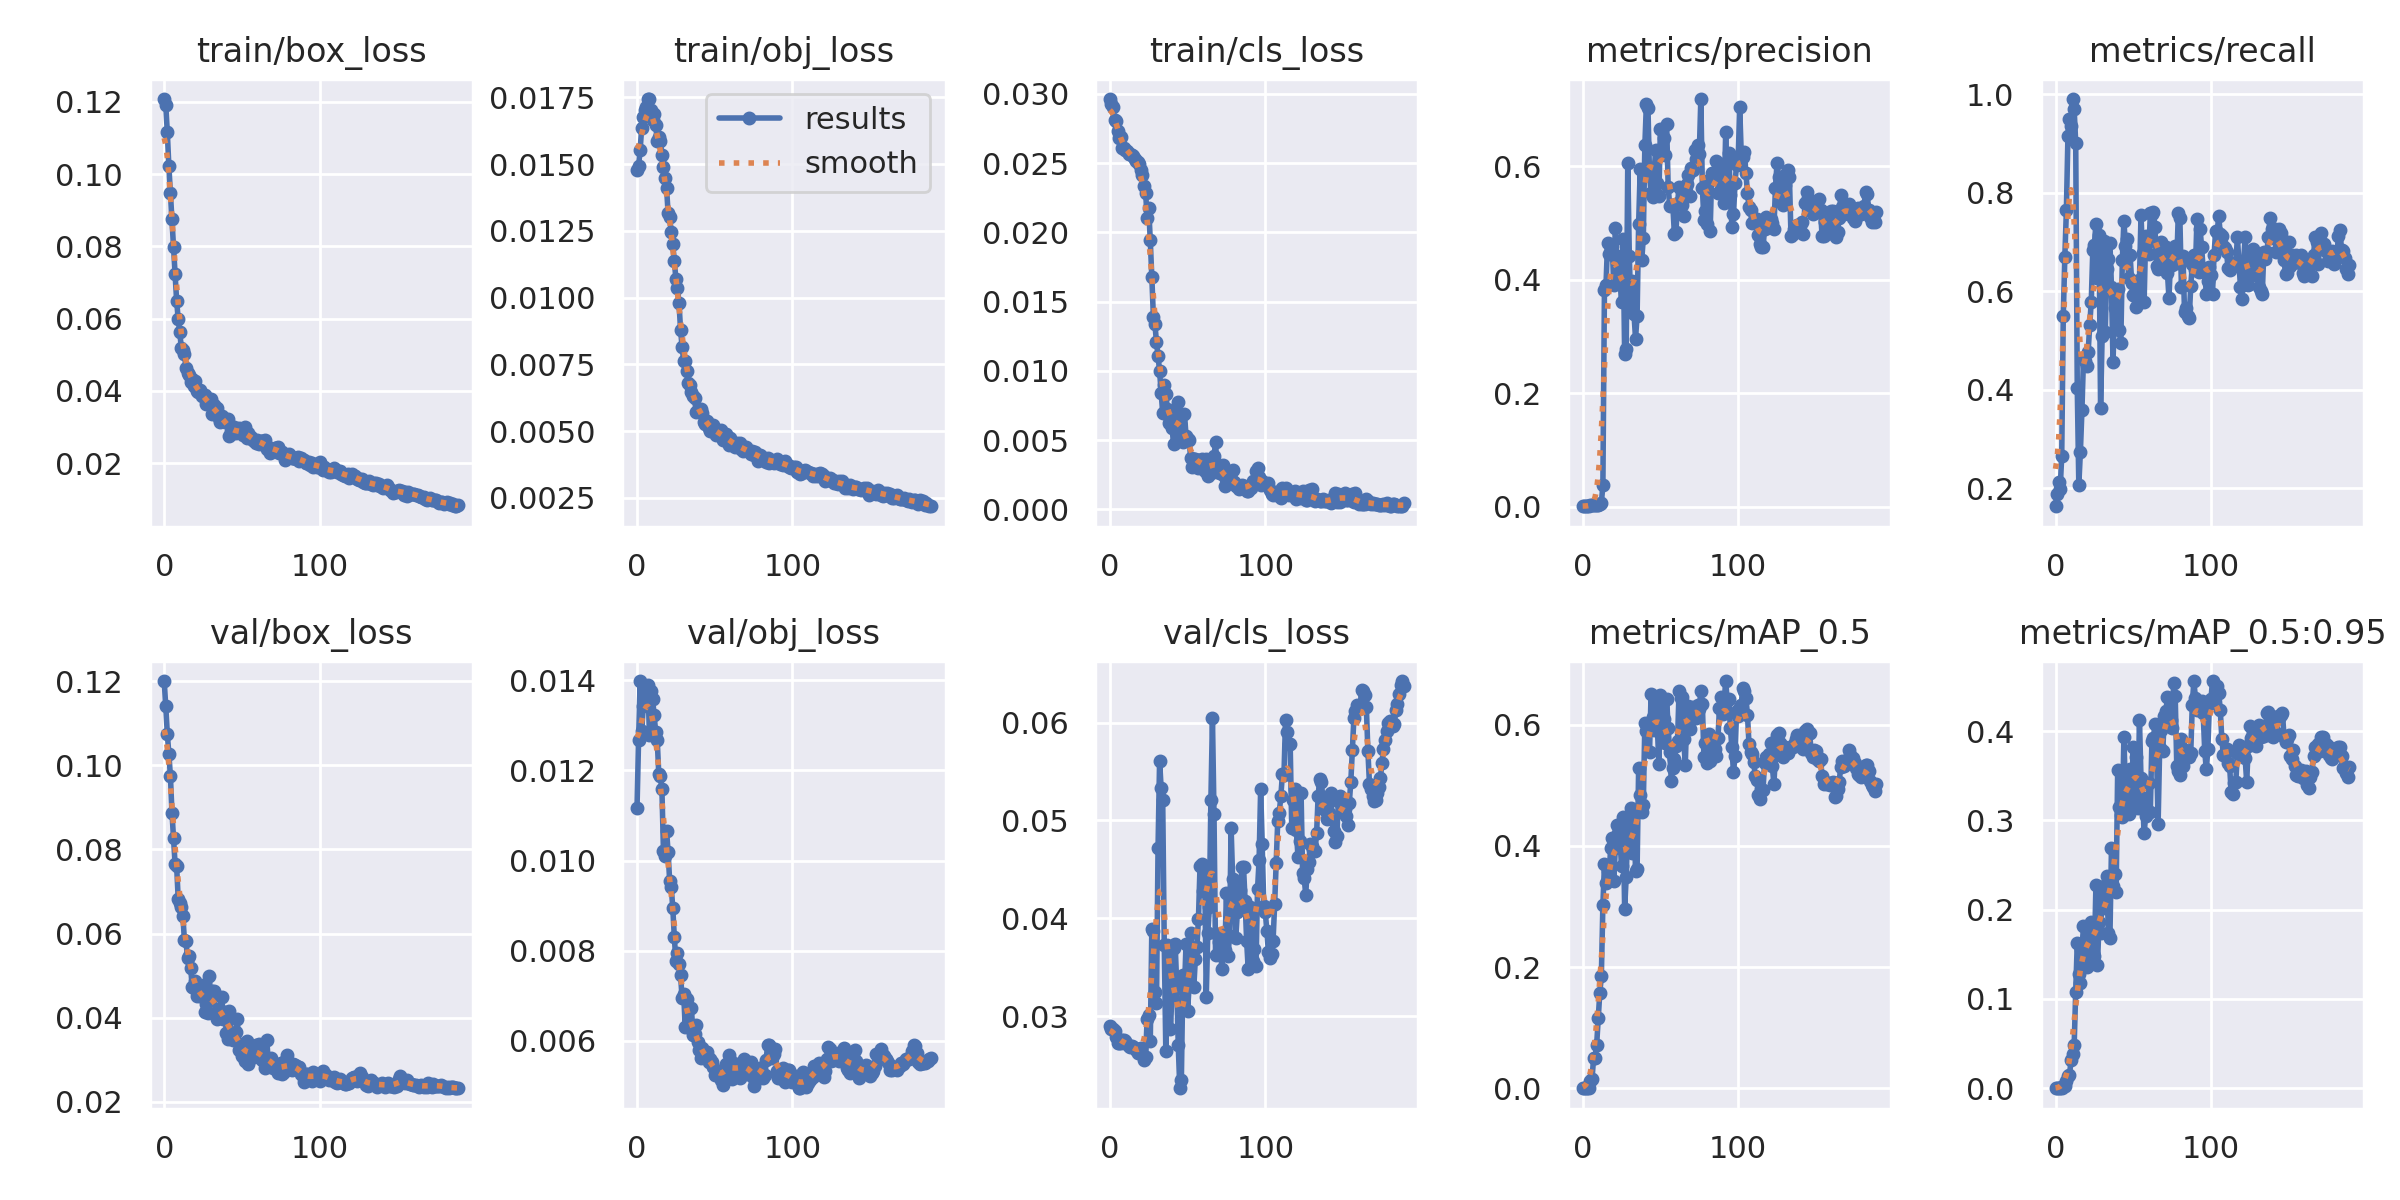

In [ ]:
display(Image(filename='yolov5/runs/train/coronal/results.png'))

## Sagittal Plane Model

In [ ]:
# Training sagittal plane
!python yolov5/train.py --img 480 --batch 80 --epochs 200 --data data/sagittal/sagittal.yaml --weights yolov5m.pt --device 0 --name sagittal --hyp ./data/augmentation.yaml

# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/sagittal/weights/best.pt', f'{output_folder}/tumor_detector_sagittal.pt')

2024-02-18 19:06:28.169935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 19:06:28.169987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 19:06:28.171387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/sagittal/sagittal.yaml, hyp=./data/augmentation.yaml, epochs=200, batch_size=80, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, si

FileNotFoundError: [Errno 2] No such file or directory: 'output_models/tumor_detector_sagittal.pt'

In [ ]:
# Copy the fine-tuned model inside the output folder
shutil.copyfile('yolov5/runs/train/sagittal/weights/best.pt', f'{output_folder}/tumor_detector_sagittal.pt')

'output_models/tumor_detector_sagittal.pt'

In [ ]:
%cd /content/yolov5/runs/train
!zip -r sagittal.zip sagittal/

/content/yolov5/runs/train
  adding: sagittal/ (stored 0%)
  adding: sagittal/train_batch1.jpg (deflated 39%)
  adding: sagittal/train_batch0.jpg (deflated 36%)
  adding: sagittal/val_batch0_labels.jpg (deflated 48%)
  adding: sagittal/PR_curve.png (deflated 18%)
  adding: sagittal/events.out.tfevents.1707673916.fa2df1c05243.560.0 (deflated 39%)
  adding: sagittal/opt.yaml (deflated 51%)
  adding: sagittal/train_batch2.jpg (deflated 33%)
  adding: sagittal/weights/ (stored 0%)
  adding: sagittal/weights/best.pt (deflated 8%)
  adding: sagittal/weights/last.pt (deflated 8%)
  adding: sagittal/labels_correlogram.jpg (deflated 45%)
  adding: sagittal/hyp.yaml (deflated 45%)
  adding: sagittal/labels.jpg (deflated 35%)
  adding: sagittal/val_batch0_pred.jpg (deflated 45%)
  adding: sagittal/R_curve.png (deflated 13%)
  adding: sagittal/confusion_matrix.png (deflated 34%)
  adding: sagittal/results.csv (deflated 83%)
  adding: sagittal/P_curve.png (deflated 11%)
  adding: sagittal/results.p

In [ ]:
from google.colab import files
files.download('sagittal.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### F1 Curve

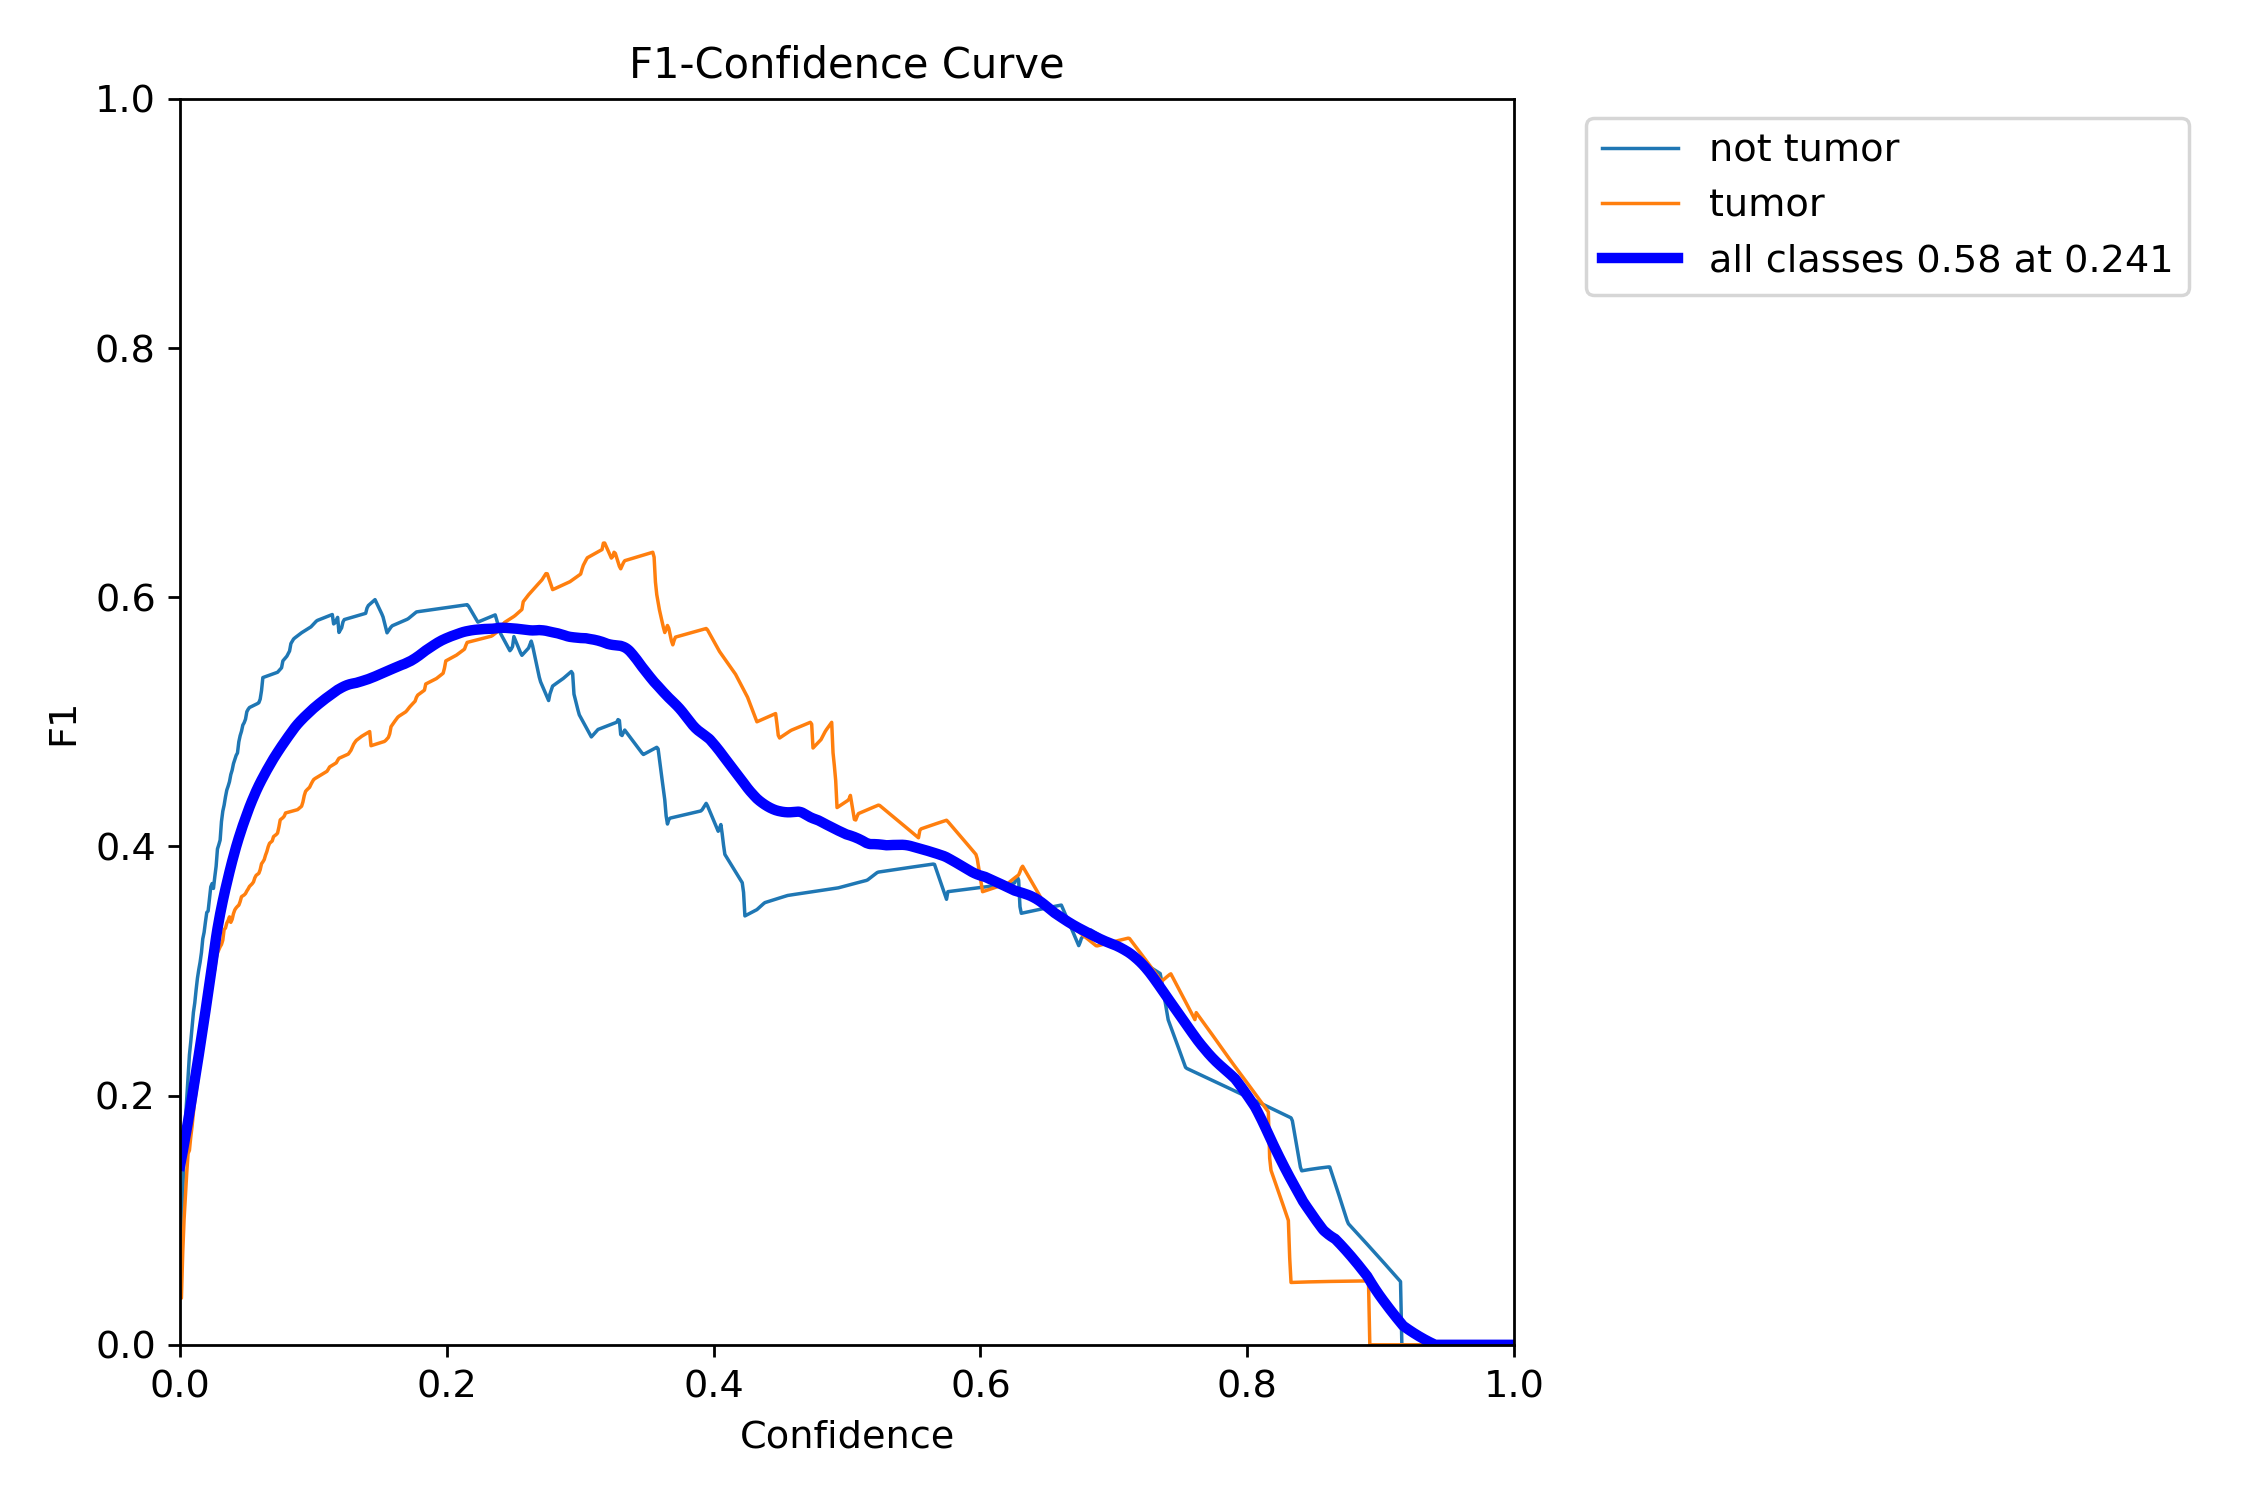

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/F1_curve.png'))

### PR Curve

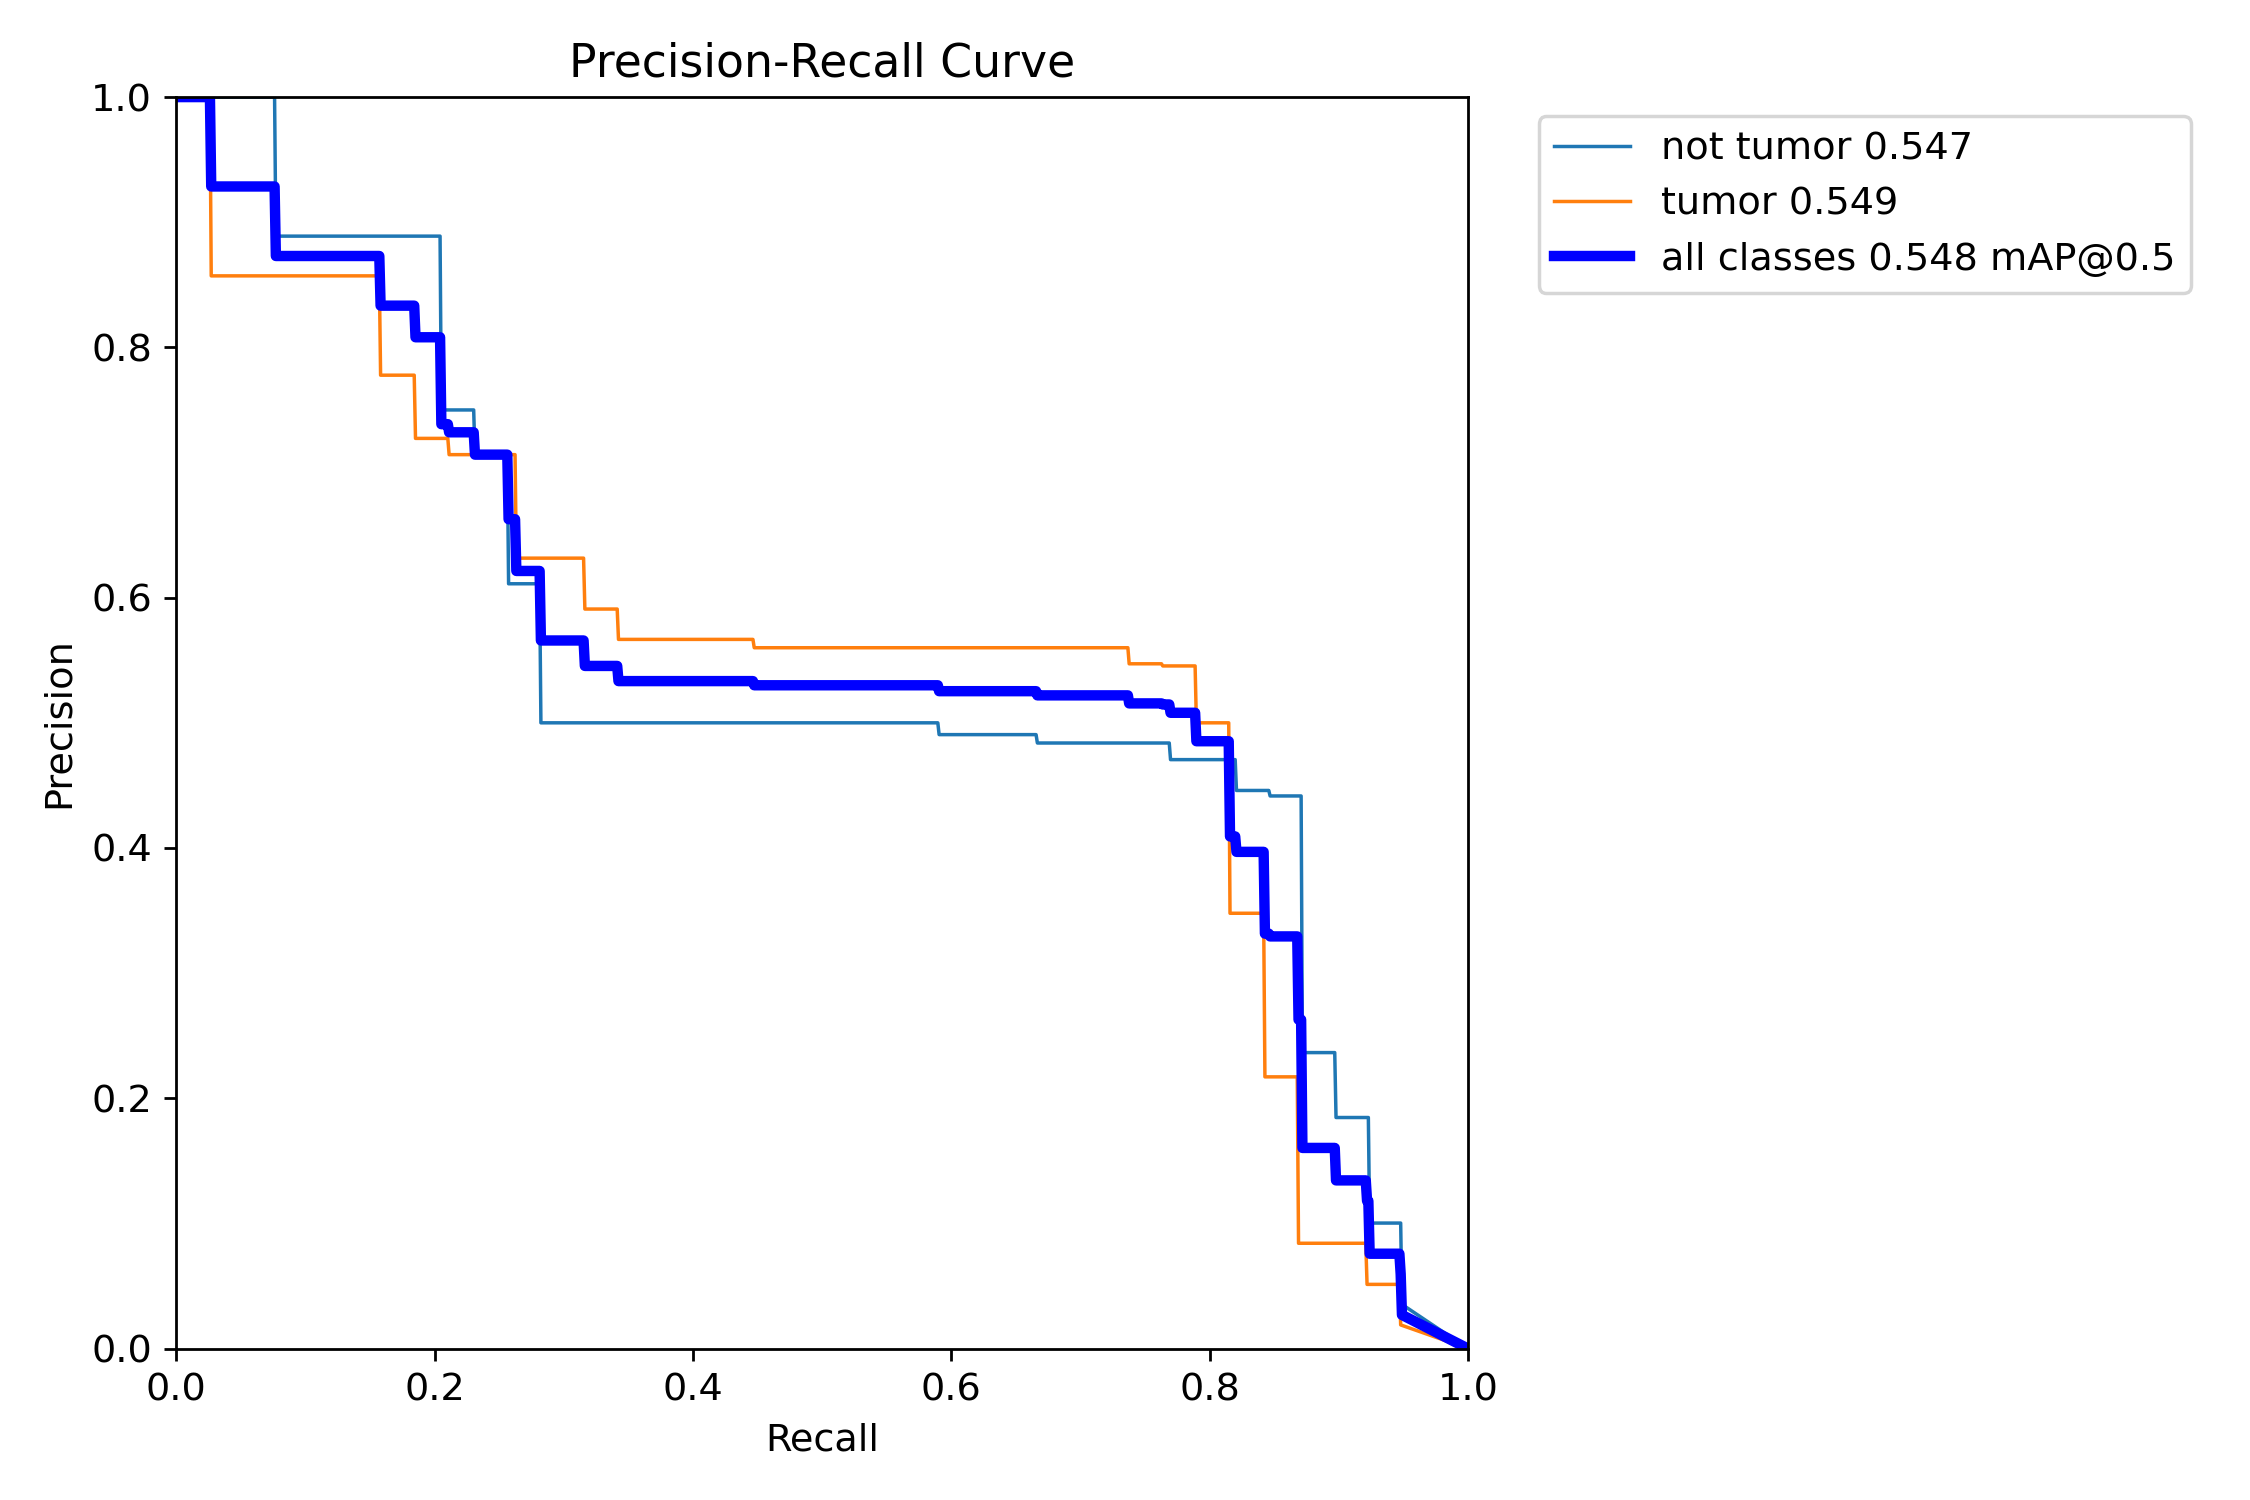

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/PR_curve.png'))

### Confusion Matrix

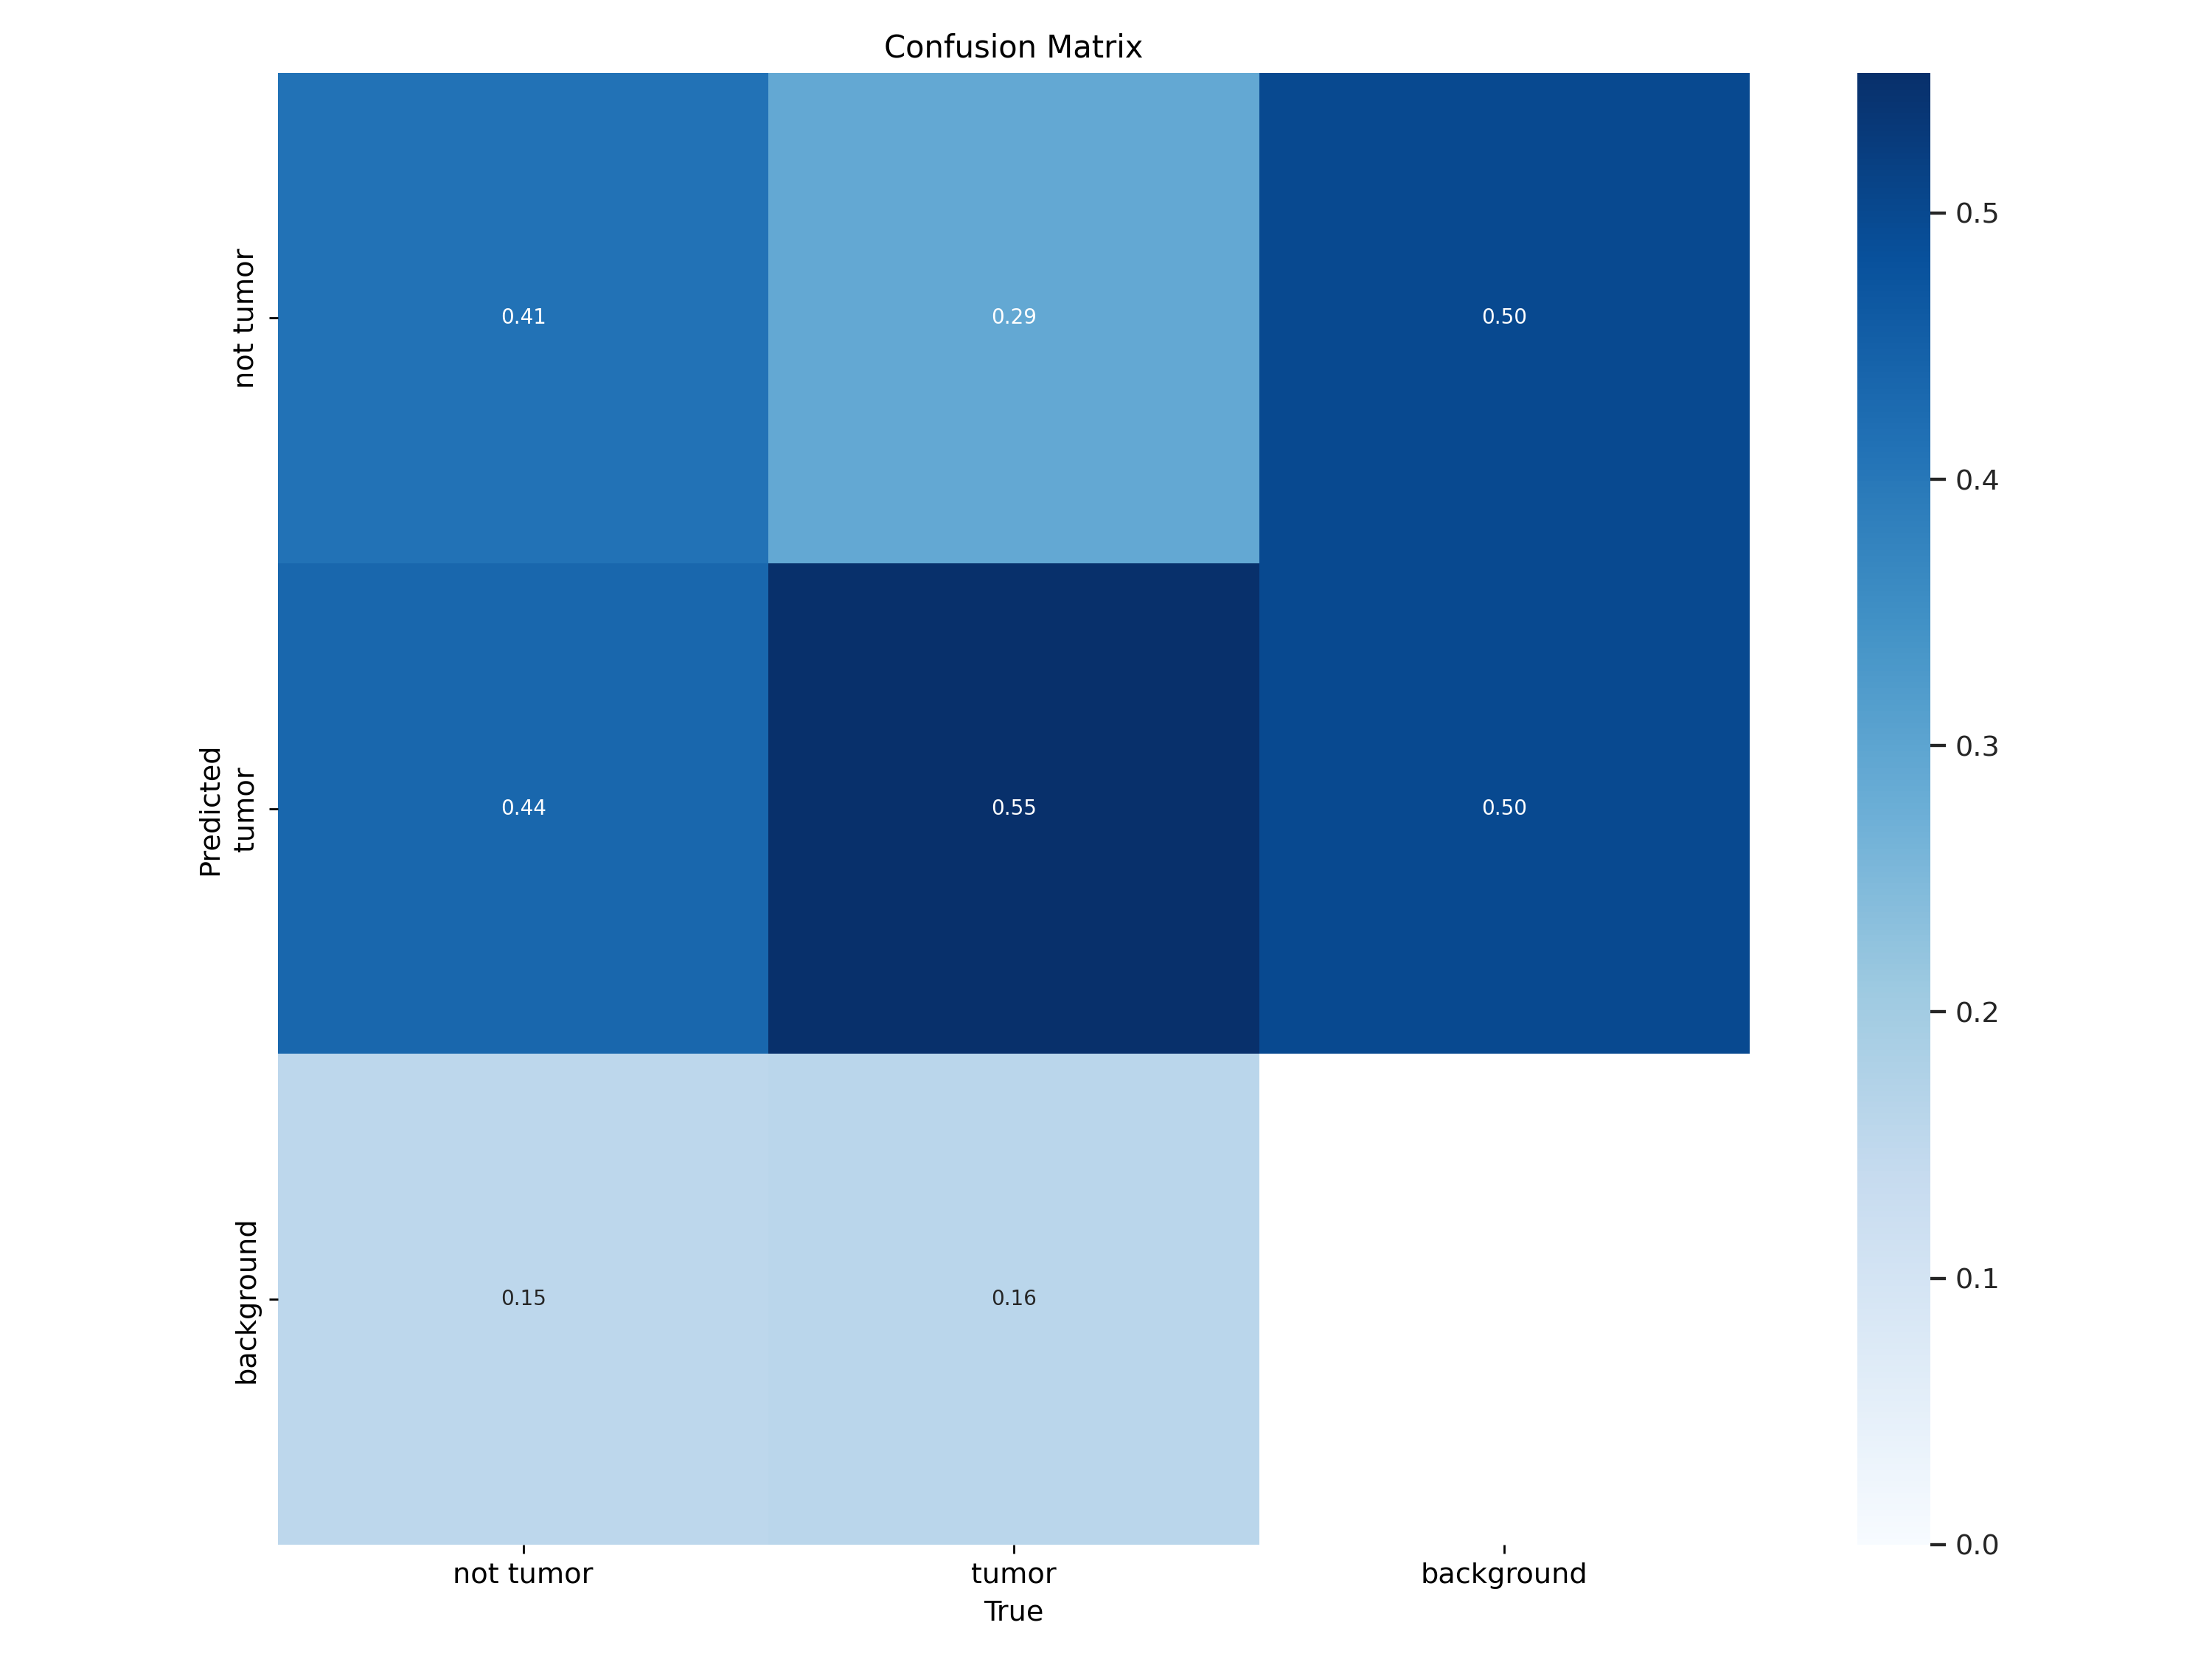

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/confusion_matrix.png'))

### Results

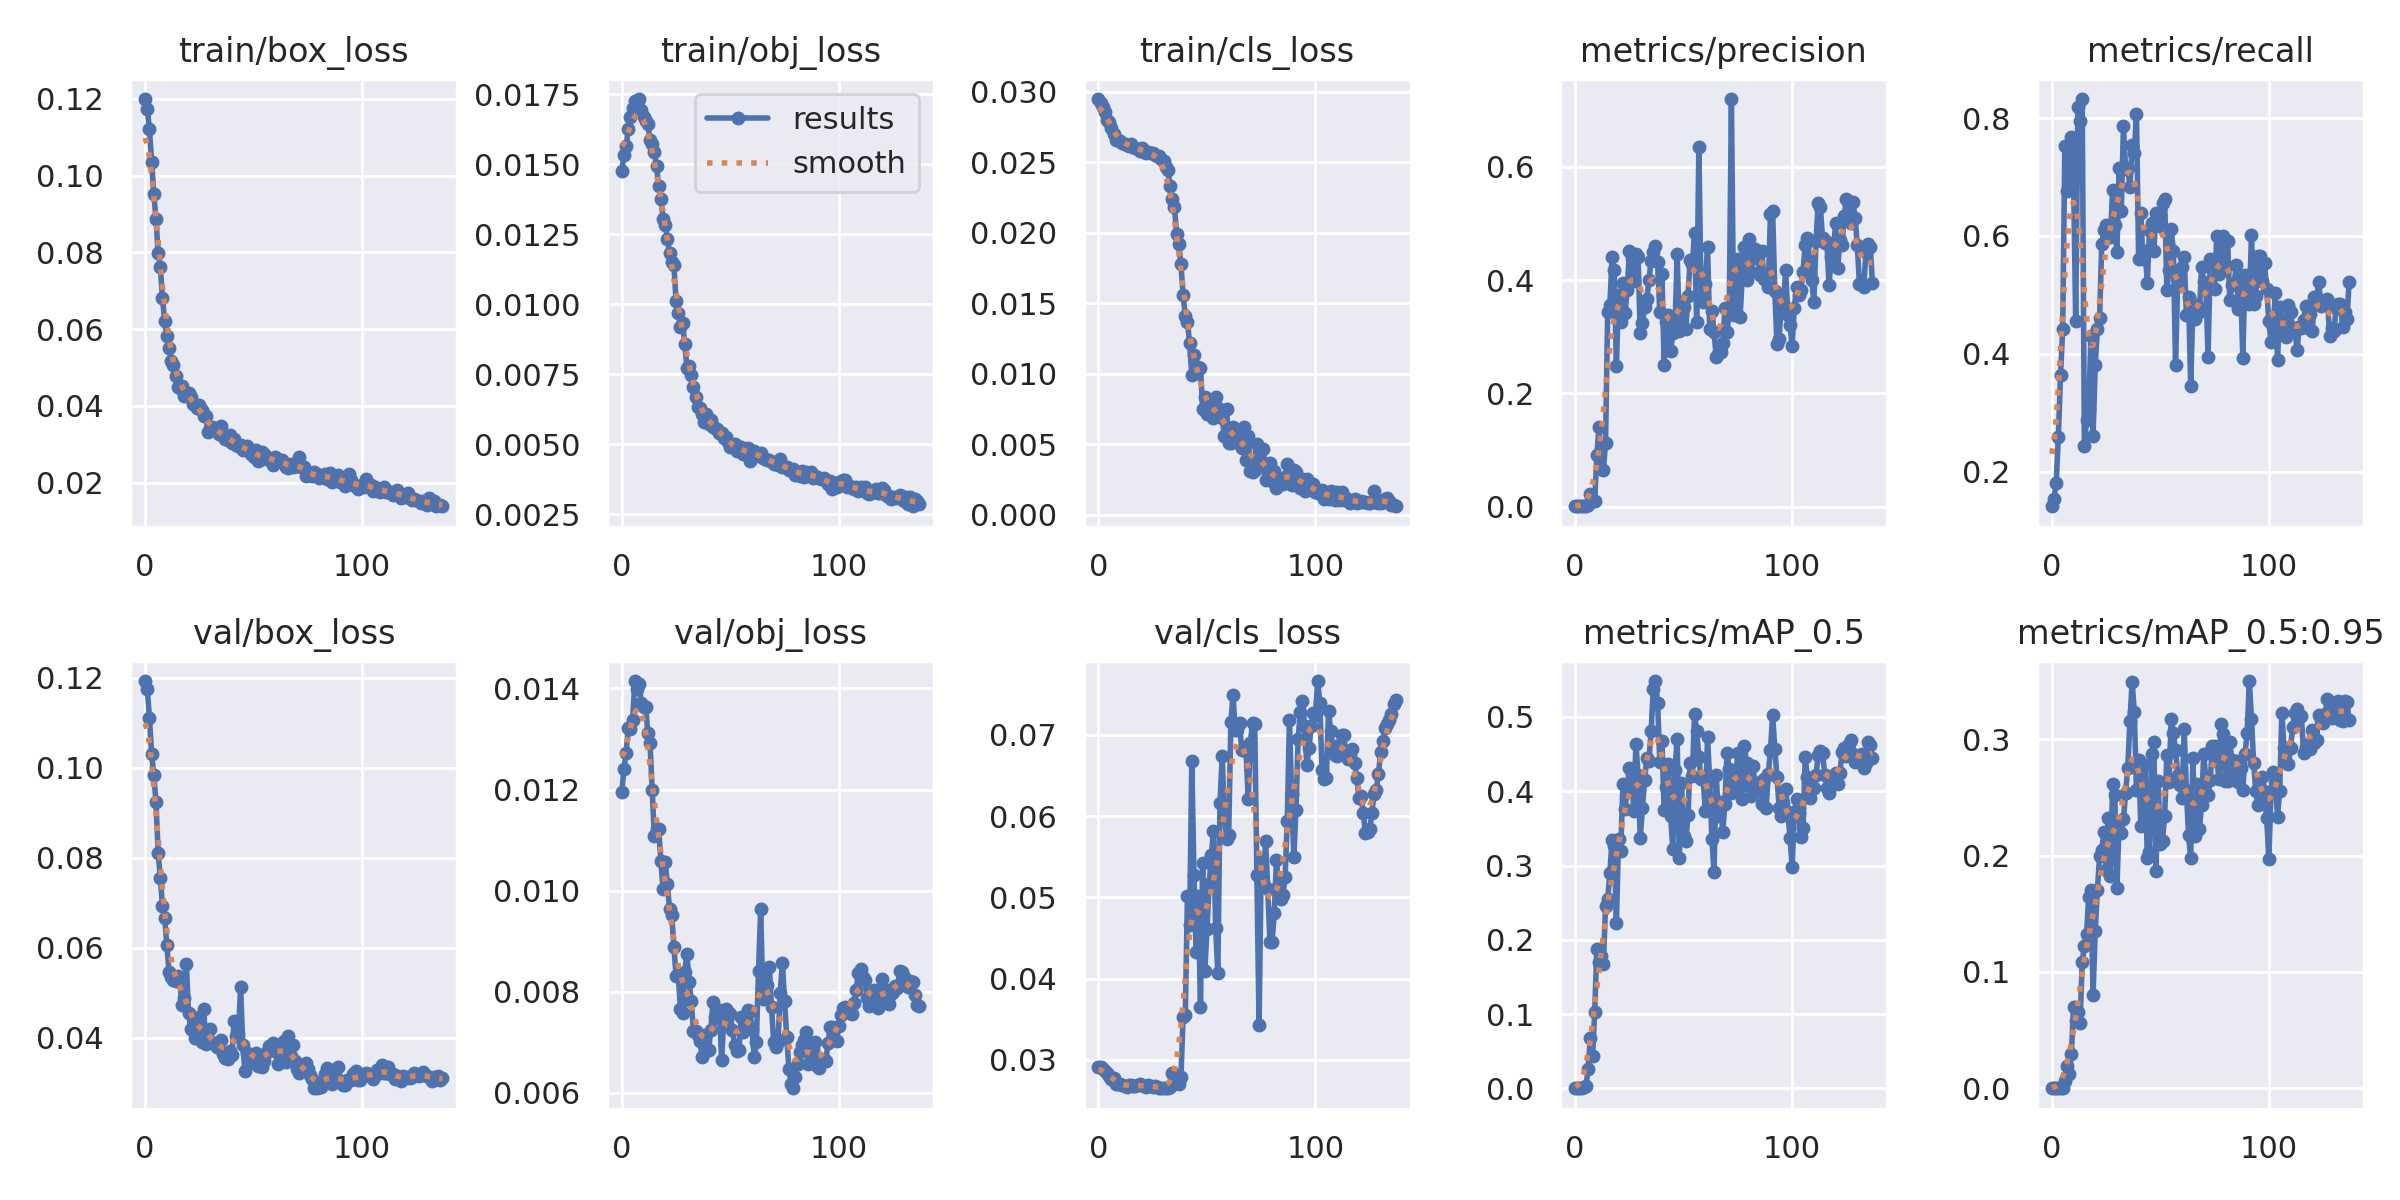

In [ ]:
display(Image(filename='yolov5/runs/train/sagittal/results.png'))

# Testing the models

Let's test our models with never seen images during the training.

## Axial Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg --save-txt


detect: weights=['output_models/tumor_detector_axial.pt'], source=https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
Found https://prod-images-static.radiopaedia.org/images/5651/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg locally at b510dc0d5cd3906018c4dd49b98643_gallery.jpeg
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CPU

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 309, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 304, in main
    run(**vars(opt))
  F

In [ ]:
display(Image(filename='yolov5/runs/detect/exp/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg'))

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5/runs/detect/exp/b510dc0d5cd3906018c4dd49b98643_gallery.jpeg'

## Coronal Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_coronal.pt --img 640 --conf 0.4 --source https://www.mriclinicalcasemap.philips.com/content/images/cases/case154/thumbs/14.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp2/14.jpg'))

python3: can't open file '/content/yolov5/detect.py': [Errno 2] No such file or directory


NameError: name 'Image' is not defined

## Sagittal Model

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_sagittal.pt --img 640 --conf 0.4 --source https://prod-images-static.radiopaedia.org/images/4440984/10a4749375e20983b677e0502a9d7f_gallery.jpg --save-txt

display(Image(filename='yolov5/runs/detect/exp3/10a4749375e20983b677e0502a9d7f_gallery.jpg'))

detect: weights=['output_models/tumor_detector_sagittal.pt'], source=https://prod-images-static.radiopaedia.org/images/4440984/10a4749375e20983b677e0502a9d7f_gallery.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
100% 18.1k/18.1k [00:00<00:00, 38.1MB/s]
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/10a4749375e20983b677e0502a9d7f_gallery.jpg: 640x640 1 not tumor, 26.9ms
Speed: 0.5ms pre-process, 26.9ms inference, 497.5ms NMS per image at shape (1, 3, 640, 640)
R

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5/runs/detect/exp3/10a4749375e20983b677e0502a9d7f_gallery.jpg'

In [18]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import numpy as np
import itertools
import datetime

import cv2
import os
import io

In [19]:
if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/giuseppebrb/BrainTumorDetection/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

# Folder for fine-tuned models
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!ls /content/drive/MyDrive/keras/brain-tumor/Testing

glioma	meningioma  notumor  pituitary


In [ ]:
print(os.listdir(testPath[1]))

NameError: name 'testPath' is not defined

In [22]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

x_train = [] # training images.
y_train  = [] # training labels.
x_test = [] # testing images.
y_test = [] # testing labels.

image_size = 200

trainPath=["/content/drive/My Drive/keras/brain-tumor/Training/glioma", "/content/drive/My Drive/keras/brain-tumor/Training/meningioma", "/content/drive/My Drive/keras/brain-tumor/Training/notumor", "/content/drive/My Drive/keras/brain-tumor/Training/pituitary"]
testPath=["/content/drive/My Drive/keras/brain-tumor/Testing/glioma", "/content/drive/My Drive/keras/brain-tumor/Testing/meningioma", "/content/drive/My Drive/keras/brain-tumor/Testing/notumor", "/content/drive/My Drive/keras/brain-tumor/Testing/pituitary"]

for i in range(3):
    for file in tqdm(os.listdir(trainPath[i])):
        image = cv2.imread(os.path.join(trainPath[i], file),0) # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image.
        image = cv2.resize(image, (image_size, image_size)) # resize images into 150*150.
        x_train.append(image)
        y_train.append(i)

    for file in tqdm(os.listdir(testPath[i])):
        image = cv2.imread(os.path.join(testPath[i], file),0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(i)


x_train = np.array(x_train) / 255.0 # normalize Images into range 0 to 1.
x_test = np.array(x_test) / 255.0

print(x_train.shape)
print(x_test.shape)

100%|██████████| 405/405 [00:04<00:00, 91.66it/s] 


(4255, 200, 200, 3)
(1011, 200, 200, 3)


In [28]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/keras/brain-tumor/Testing/glioma' --save-txt



detect: weights=['output_models/tumor_detector_axial.pt'], source=/content/drive/MyDrive/keras/brain-tumor/Testing/glioma, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/300 /content/drive/MyDrive/keras/brain-tumor/Testing/glioma/Te-glTr_0000.jpg: 640x640 1 tumor, 26.9ms
image 2/300 /content/drive/MyDrive/keras/brain-tumor/Testing/glioma/Te-glTr_0001.jpg: 640x640 1 tumor, 27.1ms
image 3/300

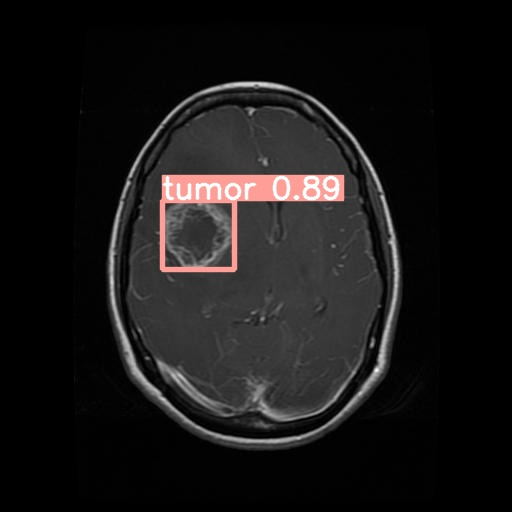

In [30]:
display(Image(filename='yolov5/runs/detect/exp3/Te-gl_0014.jpg'))

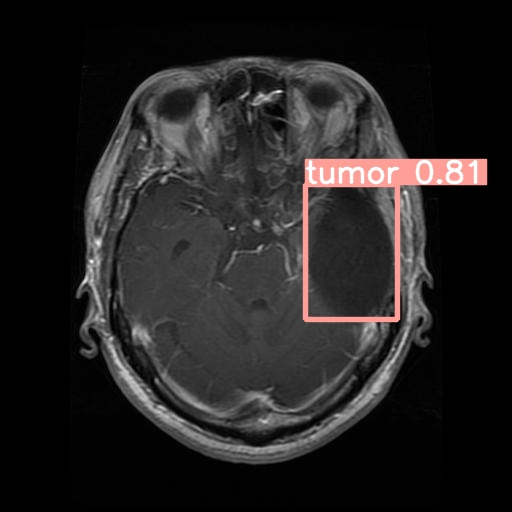

In [34]:
display(Image(filename='yolov5/runs/detect/exp3/Te-gl_0015.jpg'))

In [32]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/keras/brain-tumor/Testing/notumor' --save-txt


detect: weights=['output_models/tumor_detector_axial.pt'], source=/content/drive/MyDrive/keras/brain-tumor/Testing/notumor, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/405 /content/drive/MyDrive/keras/brain-tumor/Testing/notumor/Te-noTr_0000.jpg: 640x640 (no detections), 27.0ms
image 2/405 /content/drive/MyDrive/keras/brain-tumor/Testing/notumor/Te-noTr_0001.jpg: 640x608 (no detections), 95.1ms
image 3/405 /content/drive/MyDrive

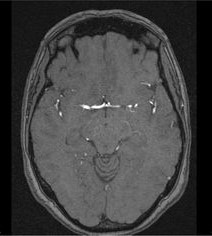

In [38]:
display(Image(filename='yolov5/runs/detect/exp4/Te-no_0017.jpg'))

In [39]:
!python yolov5/detect.py --weights output_models/tumor_detector_axial.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/keras/brain-tumor/Testing/meningioma' --save-txt


detect: weights=['output_models/tumor_detector_axial.pt'], source=/content/drive/MyDrive/keras/brain-tumor/Testing/meningioma, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/306 /content/drive/MyDrive/keras/brain-tumor/Testing/meningioma/Te-meTr_0000.jpg: 416x640 (no detections), 48.8ms
image 2/306 /content/drive/MyDrive/keras/brain-tumor/Testing/meningioma/Te-meTr_0001.jpg: 640x544 4 tumors, 53.0ms
image 3/306 /content/drive/MyDri

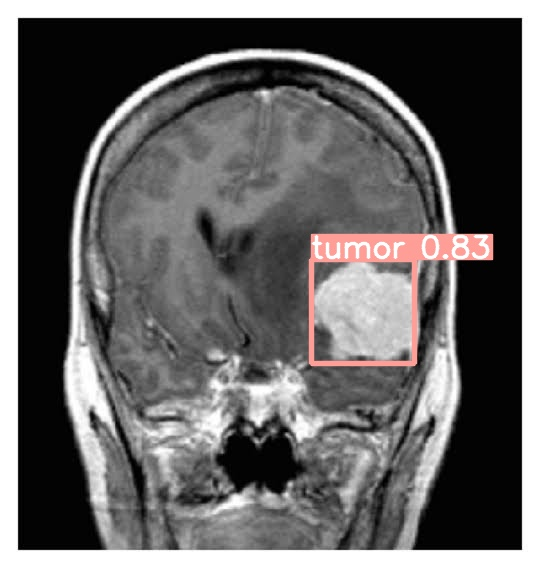

In [42]:
display(Image(filename='yolov5/runs/detect/exp5/Te-me_0014.jpg'))

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_sagittal.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/keras/brain-tumor/Testing/glioma' --save-txt

display(Image(filename='yolov5/runs/detect/exp3/Te-gl_0036.jpg'))

detect: weights=['output_models/tumor_detector_sagittal.pt'], source=/content/drive/MyDrive/keras/brain-tumor/Testing/glioma, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/300 /content/drive/MyDrive/keras/brain-tumor/Testing/glioma/Te-glTr_0000.jpg: 640x640 (no detections), 27.0ms
image 2/300 /content/drive/MyDrive/keras/brain-tumor/Testing/glioma/Te-glTr_0001.jpg: 640x640 (no detections), 27.0ms
image 3/300 /content/drive/MyDrive

FileNotFoundError: [Errno 2] No such file or directory: 'yolov5/runs/detect/exp3/Te-gl_0036.jpg'

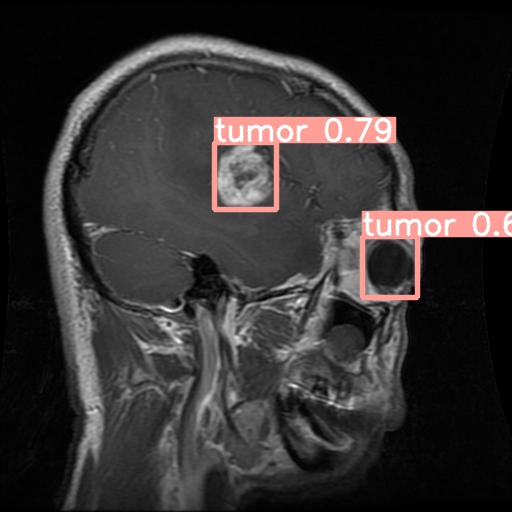

In [ ]:
display(Image(filename='yolov5/runs/detect/exp/Te-gl_0150.jpg'))

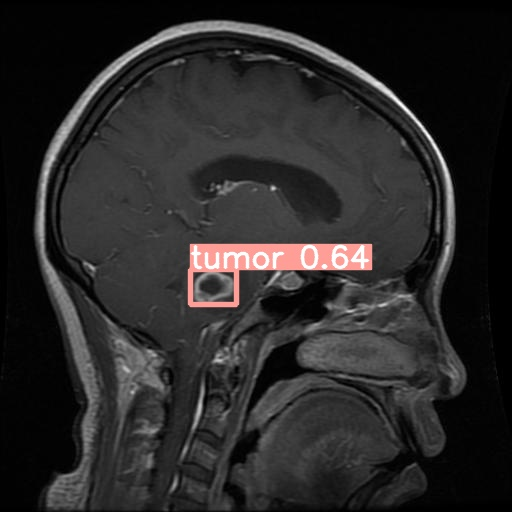

In [ ]:
display(Image(filename='yolov5/runs/detect/exp/Te-gl_0167.jpg'))

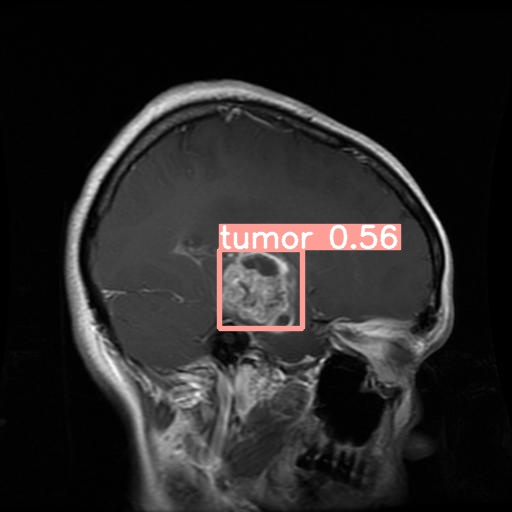

In [ ]:
display(Image(filename='yolov5/runs/detect/exp/Te-gl_0191.jpg'))

In [ ]:
!python yolov5/detect.py --weights output_models/tumor_detector_coronal.pt --img 640 --conf 0.4 --source '/content/drive/MyDrive/keras/brain-tumor/Testing/meningioma' --save-txt



detect: weights=['output_models/tumor_detector_coronal.pt'], source=/content/drive/MyDrive/keras/brain-tumor/Testing/meningioma, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 309, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 304, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", 